# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

#from plotly import plotly
#import plotly.offline as offline
#import plotly.graph_objs as go
#offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [4]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
project_data = pd.read_csv('drive/My Drive/Assignments_DonorsChoose_2018/train_data.csv')
resource_data = pd.read_csv('drive/My Drive/Assignments_DonorsChoose_2018/resources.csv')

In [6]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [7]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.4 preprocessing of project_teacher_prefix

In [0]:
#Conveting it into list 
teacher_prefix_list = list(project_data['teacher_prefix'].values)

In [0]:
#https://www.daniweb.com/programming/software-development/threads/239037/how-do-i-remove-all-dots-from-a-txt-file

cat_list = []

for i in teacher_prefix_list:
    c=str(i).replace('.','')
    #c=str(i).replace('nan',' ')
    
    cat_list.append(c)
       

In [12]:
project_data['clean_teacher_prefix_list'] = cat_list

project_data['clean_teacher_prefix_list'].value_counts()

Mrs        57269
Ms         38955
Mr         10648
Teacher     2360
Dr            13
nan            3
Name: clean_teacher_prefix_list, dtype: int64

## 1.5 Univariate Analysis: project_grade_category

In [0]:
catogories = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    
    # consider we have text like this "Grade K-12"
    for j in i.split(','): # it will split it in two parts ["Grade", "K-12"]
        if 'Grades' in j.split(): # this will split each of the Grade based on space "Grade K-12"=> "Grade","k-12"
            j=j.replace('Grades','') # if we have the words "Grade" we are going to replace it with ''(i.e removing 'Grade')
            cat_list.append(j)
         
    

In [14]:
#Creating new column with name clean_project_grade_categories after removing Grades
project_data['clean_project_grade_categories'] = cat_list

project_data['clean_project_grade_categories'].value_counts()

 PreK-2    44225
 3-5       37137
 6-8       16923
 9-12      10963
Name: clean_project_grade_categories, dtype: int64

In [0]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_project_grade_categories'].values:
    my_counter.update(word.split())

In [0]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_project_grade_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))




In [17]:
for i, j in sorted_project_grade_dict.items():
    print("{:20} :{:10}".format(i,j))
    
    


9-12                 :     10963
6-8                  :     16923
3-5                  :     37137
PreK-2               :     44225


## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [19]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,clean_teacher_prefix_list,clean_project_grade_categories,essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,Mrs,PreK-2,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Mr,6-8,Our students arrive to our school eager to lea...


In [0]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [21]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [23]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [24]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [25]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [27]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:58<00:00, 1877.73it/s]


In [28]:
# after preprocesing
preprocessed_essays[20000]
number_of_words_essay=[]
#calculating number or words in esaay 
for i in range(0,109248):
  number_of_words_essay.append(len(preprocessed_essays[i].split()))
  
len(number_of_words_essay)

109248

In [29]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [0]:
# similarly you can preprocess the titles also

In [31]:
# similarly you can preprocess the titles also
# similarly you can preprocess the titles also
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:02<00:00, 42616.01it/s]


In [32]:
# after preprocesing
preprocessed_project_title[20000]

number_of_words_project_title=[]
#calculating number or words in esaay 
for i in range(0,109248):
  number_of_words_project_title.append(len(preprocessed_project_title[i].split()))
  
len(number_of_words_project_title)

109248

## 1.5 Preparing data for models

In [0]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [0]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


In [0]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


In [0]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [0]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 16623)


In [0]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

#### 1.5.2.2 TFIDF vectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 16623)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [0]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:06<00:00, 1631.10it/s]


109248
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [08:30<00:00, 214.10it/s]


109248
300


In [0]:
# Similarly you can vectorize for title also

### 1.5.3 Vectorizing Numerical features

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

In [0]:
price_standardized

array([[0.00098843, 0.00191166, 0.00330448, ..., 0.00153418, 0.00046704,
        0.00070265]])

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [0]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(109248, 9)
(109248, 30)
(109248, 16623)
(109248, 1)


In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(109248, 16663)

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__ Computing Sentiment Scores__

In [0]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

D:\installed\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# Assignment 9: RF and GBDT

#### Response Coding: Example

<img src='response.JPG' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
          <li> Consider the following range for hyperparameters <b>n_estimators</b> = [10, 50, 100, 150, 200, 300, 500, 1000], 
            <b>max_depth</b> = [2, 3, 4, 5, 6, 7, 8, 9, 10] </li>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Random Forest and GBDT </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [33]:
#Considering 109248 data points from project_data
project_data=project_data.head(30000)
print(project_data.shape)
project_data.head(1)

(30000, 20)


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,clean_teacher_prefix_list,clean_project_grade_categories,essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,Mrs,PreK-2,My students are English learners that are work...


In [34]:
# 109248 data points from resource_data
resource_data=resource_data.head(30000)
print(resource_data.shape)
resource_data.head(2)

(30000, 4)


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [35]:
project_data['project_is_approved'].value_counts()

1    25380
0     4620
Name: project_is_approved, dtype: int64

In [0]:
# storing quantity from resource_data in variable 
data_quantity=resource_data['quantity'].values

In [0]:
#Creating new column named quantity in project_data
project_data['quantity']=data_quantity

In [0]:
project_data['preprocessed_essays']=preprocessed_essays[:30000]

In [0]:
project_data['preprocessed_project_title']=preprocessed_project_title[:30000]

In [0]:
#Creating new column named number_of_words_essay
project_data['number_of_words_essay_all']=number_of_words_essay[:30000]

In [0]:
#Creating new column named number_of_words_project_title
project_data['number_of_words_project_title']=number_of_words_project_title[:30000]

In [0]:
#storing price from resource_data in variable
data_price=resource_data['price'].values

In [0]:
#Creating new column named price in project_data
project_data['price']=data_price

In [44]:
#Print complete dataset after all these operations
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,clean_teacher_prefix_list,clean_project_grade_categories,essay,quantity,preprocessed_essays,preprocessed_project_title,number_of_words_essay_all,number_of_words_project_title,price
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,Mrs,PreK-2,My students are English learners that are work...,1,my students english learners working english s...,educational support english learners home,161,5,149.00
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Mr,6-8,Our students arrive to our school eager to lea...,3,our students arrive school eager learn they po...,wanted projector hungry learners,109,4,14.95


In [0]:
#storing target in data_y variable and features in data_x
data_y=project_data['project_is_approved']
#project_data.drop(['project_is_approved'],axis=1,inplace=True)
data_x=project_data

In [46]:
# Print shape of features 
data_x.shape

(30000, 26)

In [47]:
#Print shape of target
data_y.shape

(30000,)

## Splitting Data into Train and Test

In [0]:
from sklearn.model_selection import train_test_split #SKlearn 

In [0]:
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.30,stratify=data_y)

In [50]:
print("Train")
print(x_train.shape,y_train.shape)
print("Test")
print(x_test.shape,y_test.shape)

Train
(21000, 26) (21000,)
Test
(9000, 26) (9000,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label




##  Response coding Function

In [0]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = x_train[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(0,2):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = x_train.loc[(x_train['project_is_approved']==k) & (x_train[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 20*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = x_train[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/2,1/2])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

### Response Coding of state (Train Data)

In [0]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
df_train_state_rc = np.array(get_gv_feature(alpha, "school_state", x_train))


In [53]:
df_train_state_rc.shape

(21000, 2)

### Response coding of state (Test Data)

In [0]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
df_test_state_rc = np.array(get_gv_feature(alpha, "school_state", x_test))


In [55]:
df_test_state_rc.shape

(9000, 2)

In [56]:
print("Train Data: -",df_train_state_rc.shape,y_train.shape)
print("Test Data:- ",df_test_state_rc.shape,y_test.shape)

Train Data: - (21000, 2) (21000,)
Test Data:-  (9000, 2) (9000,)


### Response coding for the catogorical features: teacher_prefix(Train Data)

In [0]:
df_train_teacher_prefix_rc = np.array(get_gv_feature(alpha, "clean_teacher_prefix_list", x_train))

In [58]:
df_train_teacher_prefix_rc.shape

(21000, 2)

### Response coding for the catogorical features: teacher_prefix(Test Data)

In [0]:
df_test_teacher_prefix_rc=np.array(get_gv_feature(alpha, "clean_teacher_prefix_list", x_test))

In [60]:
print("Train Data: -",df_train_teacher_prefix_rc.shape,y_train.shape)
print("Test Data:- ",df_test_teacher_prefix_rc.shape,y_test.shape)

Train Data: - (21000, 2) (21000,)
Test Data:-  (9000, 2) (9000,)


### Response coding for the catogorical features: clean_categories(Train Data)

In [0]:
df_train_clean_categories_rc=np.array(get_gv_feature(alpha, "clean_categories", x_train))

In [62]:
df_train_clean_categories_rc.shape

(21000, 2)

### Response coding for the catogorical features: clean_categories(Test Data)

In [0]:
df_test_clean_categories_rc=np.array(get_gv_feature(alpha, "clean_categories", x_test))

In [64]:
df_test_clean_categories_rc.shape

(9000, 2)

In [65]:
print("Train Data: -",df_train_clean_categories_rc.shape,y_train.shape)
print("Test Data:- ",df_test_clean_categories_rc.shape,y_test.shape)

Train Data: - (21000, 2) (21000,)
Test Data:-  (9000, 2) (9000,)


### Response coding for the clean_subcategories (Train Data)

In [0]:
df_train_clean_subcategories_rc=np.array(get_gv_feature(alpha, "clean_subcategories", x_train))

In [67]:
df_train_clean_subcategories_rc.shape

(21000, 2)

### Response coding for the clean_subcategories (Test Data)

In [0]:
df_test_clean_subcategories_rc=np.array(get_gv_feature(alpha, "clean_subcategories", x_test))

In [69]:
df_test_clean_subcategories_rc.shape

(9000, 2)

In [70]:
print("Train Data: -",df_train_clean_subcategories_rc.shape,y_train.shape)
print("Test Data:- ",df_test_clean_subcategories_rc.shape,y_test.shape) 

Train Data: - (21000, 2) (21000,)
Test Data:-  (9000, 2) (9000,)


### Response coding for the catogorical features: project_grade_category(Train Data)

In [0]:
df_train_project_grade_category_rc=np.array(get_gv_feature(alpha, "clean_project_grade_categories", x_train))

In [72]:
df_train_project_grade_category_rc.shape

(21000, 2)

### Response coding for the catogorical features: project_grade_category(Test Data)

In [0]:
df_test_project_grade_category_rc=np.array(get_gv_feature(alpha, "clean_project_grade_categories", x_test))

In [74]:
df_test_project_grade_category_rc.shape

(9000, 2)

In [75]:
print("Train Data: -",df_train_project_grade_category_rc.shape,y_train.shape)
print("Test Data:- ",df_test_project_grade_category_rc.shape,y_test.shape)

Train Data: - (21000, 2) (21000,)
Test Data:-  (9000, 2) (9000,)


## Encoding Numerical (quantity)

In [76]:
from sklearn.preprocessing import Normalizer # SKlearn
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(x_train['quantity'].values.reshape(-1,1))

x_train_quantity_norm = normalizer.transform(x_train['quantity'].values.reshape(-1,1))
x_test_quantity_norm = normalizer.transform(x_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_quantity_norm.shape, y_train.shape)
print(x_test_quantity_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(21000, 1) (21000,)
(9000, 1) (9000,)


## Encoding Numerical (price)

In [77]:

normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(x_train['price'].values.reshape(-1,1))

x_train_price_norm = normalizer.transform(x_train['price'].values.reshape(-1,1))
x_test_price_norm = normalizer.transform(x_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_price_norm.shape, y_train.shape)
print(x_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(21000, 1) (21000,)
(9000, 1) (9000,)


## Encoding Numerical (teacher_number_of_previously_posted_projects)

In [78]:
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

x_train_teacher_project_norm = normalizer.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_test_teacher_project_norm = normalizer.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_teacher_project_norm.shape, y_train.shape)
print(x_test_teacher_project_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(21000, 1) (21000,)
(9000, 1) (9000,)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.4 Applying Random Forest</h2>

<br>Apply Random Forest on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applying Random Forests on BOW,<font color='red'> SET 1</font>

In [0]:
# Please write all the code with proper documentation

## Encoding Essay (BOW)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2),max_features=3000)
vectorizer.fit(x_train['preprocessed_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_essay_bow = vectorizer.transform(x_train['preprocessed_essays'].values)
x_test_essay_bow = vectorizer.transform(x_test['preprocessed_essays'].values)

print("After vectorizations")
print(x_train_essay_bow.shape, y_train.shape)
print(x_test_essay_bow.shape, y_test.shape)
print("="*100)

features_bow_essay=vectorizer.get_feature_names()

After vectorizations
(21000, 3000) (21000,)
(9000, 3000) (9000,)


## Encoding project_title (BOW)

In [0]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(x_train['preprocessed_project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_project_title_bow = vectorizer.transform(x_train['preprocessed_project_title'].values)
x_test_project_title_bow = vectorizer.transform(x_test['preprocessed_project_title'].values)

print("After vectorizations")
print(x_train_project_title_bow.shape, y_train.shape)
print(x_test_project_title_bow.shape, y_test.shape)
print("="*100)

features_project_title=vectorizer.get_feature_names()

After vectorizations
(21000, 1733) (21000,)
(9000, 1733) (9000,)


## Concatinating all the features

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_bow = hstack((x_train_essay_bow,x_train_project_title_bow,df_train_state_rc,df_train_teacher_prefix_rc,df_train_clean_categories_rc,df_train_clean_subcategories_rc,df_train_project_grade_category_rc,x_train_quantity_norm,x_train_price_norm,x_train_teacher_project_norm)).tocsr()
X_te_bow = hstack((x_test_essay_bow,x_test_project_title_bow,df_test_state_rc,df_test_teacher_prefix_rc,df_test_clean_categories_rc,df_test_clean_subcategories_rc,df_test_project_grade_category_rc,x_test_quantity_norm,x_test_price_norm,x_test_teacher_project_norm)).tocsr()

print("Final Data matrix")
print(X_tr_bow.shape, y_train.shape)
print(X_te_bow.shape, y_test.shape)
print("="*100)




Final Data matrix
(21000, 4746) (21000,)
(9000, 4746) (9000,)


## Applying Random Forest




In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
RF_clf=RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)

## 1. Find the best hyper parameter which results in the maximum AUC value
### Find the best hyper paramter using k-fold cross validation (or) simple cross validation data


### 2. K-fold cross validation


In [0]:
#https://github.com/justmarkham/scikit-learn-videos/blob/master/07_cross_validation.ipynb
#Importing library from sklearn
from sklearn.model_selection import cross_val_score


In [0]:
#Hyperparameter tunning in this range

max_depth_range=[2, 3, 4, 5, 6, 7, 8, 9, 10] 
n_estimators_range= [10, 50, 100, 150, 200, 300,500,1000]


In [0]:
#Searching optimal value of max_depth in Decision Tree

K_score=[] # creating list that stores average scores for each max_depth_range 
for alpha in n_estimators_range:
  for k in max_depth_range:
    RF_clf=RandomForestClassifier(n_estimators=alpha, max_depth=k,random_state=0,class_weight ='balanced')# passing values of k in this classifier
    scores=cross_val_score(RF_clf,X_tr_bow,y_train,cv=5,scoring='roc_auc') #storing the values of accuracy in scores list
    print("auc score=",scores.mean(),"max_depth_range =",k,"n_estimator =",alpha)
    K_score.append(scores.mean()) # appending the mean score of each value of max_depth_range
    
    
    
    

auc score= 0.5920315794655405 max_depth_range = 2 n_estimator = 10
auc score= 0.6075389761661266 max_depth_range = 3 n_estimator = 10
auc score= 0.6114814750456332 max_depth_range = 4 n_estimator = 10
auc score= 0.6202440816671698 max_depth_range = 5 n_estimator = 10
auc score= 0.6240751424414875 max_depth_range = 6 n_estimator = 10
auc score= 0.620967424099933 max_depth_range = 7 n_estimator = 10
auc score= 0.6209400316508008 max_depth_range = 8 n_estimator = 10
auc score= 0.6237199133406357 max_depth_range = 9 n_estimator = 10
auc score= 0.6245190349008787 max_depth_range = 10 n_estimator = 10
auc score= 0.6409379087529355 max_depth_range = 2 n_estimator = 50
auc score= 0.6554845222855142 max_depth_range = 3 n_estimator = 50
auc score= 0.6574453190973764 max_depth_range = 4 n_estimator = 50
auc score= 0.6609502945793049 max_depth_range = 5 n_estimator = 50
auc score= 0.6611180164505701 max_depth_range = 6 n_estimator = 50
auc score= 0.6591599240728667 max_depth_range = 7 n_estimator 

## 3. GridSearchCV

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
RF_clf=RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0,class_weight ='balanced')
parameters = {'n_estimators':n_estimators_range,    
              'max_depth': max_depth_range
             }

In [0]:
grid_search = GridSearchCV(RF_clf, parameters, cv=5, scoring='roc_auc',n_jobs=-1,verbose=2,return_train_score=True)
grid_search.fit(X_tr_bow, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 23.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=2,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='w

In [0]:
# examine the best model
print("Best Score=",grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)



Best Score= 0.6777895875007013
{'max_depth': 10, 'n_estimators': 1000}
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)


## Representation of results



#### You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure seaborn heat maps with rows as n_estimators, columns as max_depth, and values inside the cell representing AUC Score

 ### Heat maps with rows as n_estimators, columns as max_depth, and values inside the cell representing AUC Score (Train Data)

In [0]:
lis_train_data=[]
count_train=0

for i in n_estimators_range:
  for j in max_depth_range:
    lis_train_data.append((grid_search.cv_results_['mean_train_score'][count_train],j,i))
    count_train+=1


    

In [0]:
df_train_data=pd.DataFrame(data=lis_train_data,columns=['auc_score','max_depth','n_estimator'])


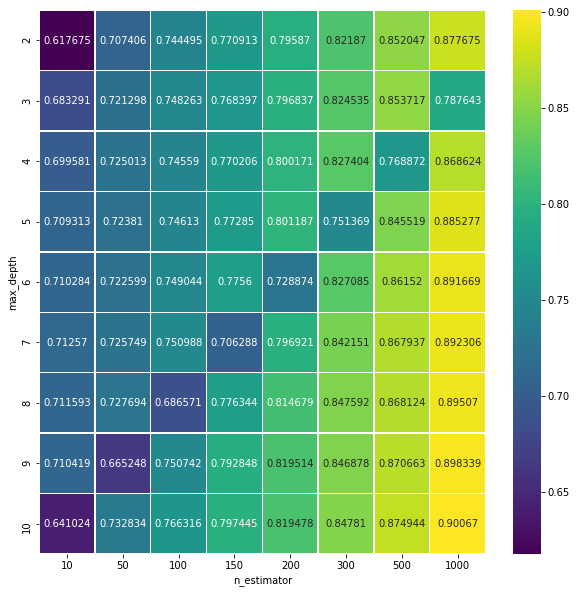

In [0]:
# https://stackoverflow.com/questions/37790429/seaborn-heatmap-using-pandas-dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn
fig, ax = plt.subplots(figsize=(10,10))

result = df_train_data.pivot(index='max_depth', columns='n_estimator', values='auc_score')
 
sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=.5,ax=ax)
plt.show()

### Heat maps with rows as n_estimators, columns as max_depth, and values inside the cell representing AUC Score(CV data Data)

In [0]:
lis_cv_data=[]
count_cv=0

for i in n_estimators_range:
  for j in max_depth_range:
    lis_cv_data.append((grid_search.cv_results_['mean_test_score'][count_cv],j,i))
    count_cv+=1


    

In [0]:
df_cv_data=pd.DataFrame(data=lis_cv_data,columns=['auc_score','max_depth','n_estimator'])


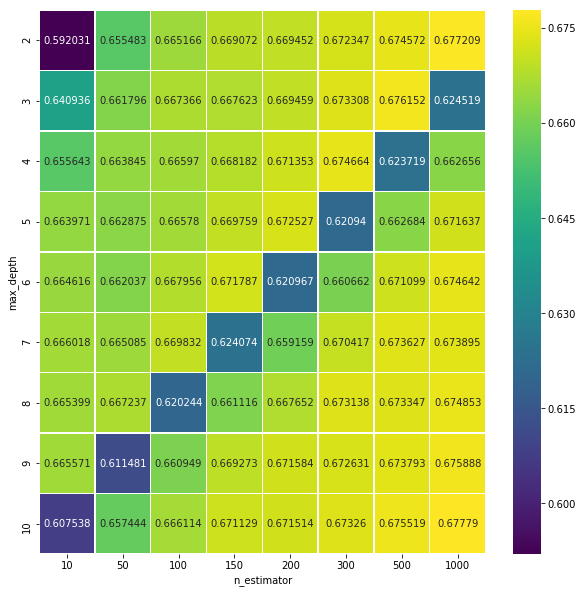

In [0]:
# https://stackoverflow.com/questions/37790429/seaborn-heatmap-using-pandas-dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn
fig, ax = plt.subplots(figsize=(10,10))

result = df_cv_data.pivot(index='max_depth', columns='n_estimator', values='auc_score')
 
sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=.5,ax=ax)
plt.show()

#### After finding the best hyper parameter, we are training our model-M using the best hyper-param.And, finding the AUC on test data and plotting the ROC curve on both train and test using model-M.

In [0]:
#here best hyper parameter (max_depth) 
best_n_estimators=1000
best_max_depth= 10


### Finding the AUC on test data and plotting the ROC curve on both train and test using model-M

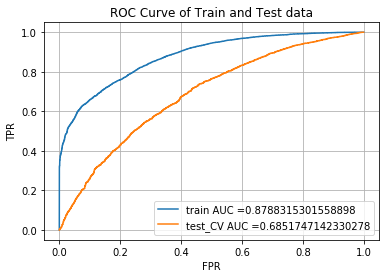

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

RF_clf=RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth,random_state=0,class_weight ='balanced')
RF_clf.fit(X_tr_bow, y_train) 
#svm_clf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred =RF_clf.predict_proba(X_tr_bow)[:,1]
y_test_pred = RF_clf.predict_proba(X_te_bow)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test_CV AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve of Train and Test data")
plt.grid()
plt.show()

### Confusion matrix with predicted and original labels of test data points

In [0]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### Confusion matrix of Train data

the maximum value of tpr*(1-fpr) 0.6118479977214961 for threshold 0.503


Text(0.5, 24.0, 'Predicted label')

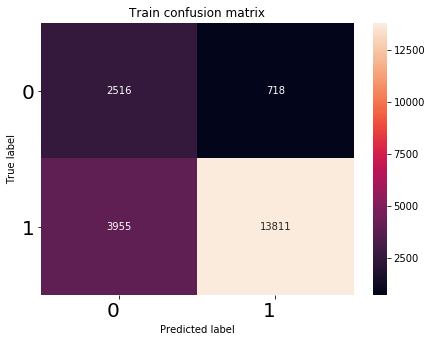

In [0]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(7,5))
cm_train=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
heatmap = sns.heatmap(cm_train, annot=True, fmt="d")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title("Train confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')


### Confusion matrix of Test data

the maximum value of tpr*(1-fpr) 0.4045625302520495 for threshold 0.516


Text(0.5, 24.0, 'Predicted label')

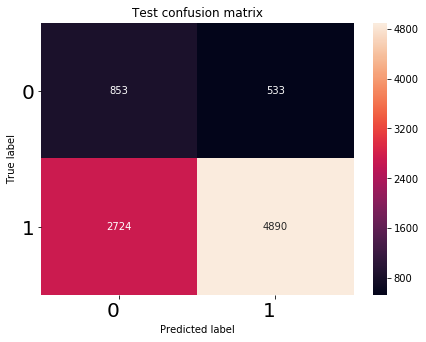

In [0]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

cm_test=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
fig = plt.figure(figsize=(7,5))
heatmap = sns.heatmap(cm_test, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title('Test confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### 2.4.2 Applying Random Forests on TFIDF,<font color='red'> SET 2</font>

In [0]:
# Please write all the code with proper documentation

### Encoding Essay (TFIDF)

In [0]:
tf_idf_vect=TfidfVectorizer(ngram_range=(1,2), min_df=10,max_features=3000)
tf_idf_vect.fit(x_train['preprocessed_essays'].values)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=3000,
                min_df=10, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
x_train_tfidf_essay=tf_idf_vect.transform(x_train['preprocessed_essays'].values)
x_test_tfidf_essay=tf_idf_vect.transform(x_test['preprocessed_essays'].values)
features_essay_tfidf=tf_idf_vect.get_feature_names()

In [0]:
print(x_train_tfidf_essay.shape,y_train.shape)
print(x_test_tfidf_essay.shape,y_test.shape)

(21000, 3000) (21000,)
(9000, 3000) (9000,)


### Encoding project_title (TFIDF)

In [0]:
tf_idf_vect=TfidfVectorizer(ngram_range=(1,2), min_df=10,max_features=3000)
tf_idf_vect.fit(x_train['preprocessed_project_title'].values)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=3000,
                min_df=10, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
x_train_tfidf_project_title=tf_idf_vect.transform(x_train['preprocessed_project_title'].values)
x_test_tfidf_project_title=tf_idf_vect.transform(x_test['preprocessed_project_title'].values)
features_project_title=tf_idf_vect.get_feature_names()

In [0]:
print(x_train_tfidf_project_title.shape,y_train.shape)
print(x_test_tfidf_project_title.shape,y_test.shape)

(21000, 1776) (21000,)
(9000, 1776) (9000,)


### Concatinating all the features

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_tfidf = hstack((x_train_tfidf_essay,x_train_tfidf_project_title,df_train_state_rc,df_train_teacher_prefix_rc,df_train_clean_categories_rc,df_train_clean_subcategories_rc,df_train_project_grade_category_rc,x_train_quantity_norm,x_train_price_norm,x_train_teacher_project_norm)).tocsr()
X_te_tfidf = hstack((x_test_tfidf_essay,x_test_tfidf_project_title,df_test_state_rc,df_test_teacher_prefix_rc,df_test_clean_categories_rc,df_test_clean_subcategories_rc,df_test_project_grade_category_rc,x_test_quantity_norm,x_test_price_norm,x_test_teacher_project_norm)).tocsr()

print("Final Data matrix")
print(X_tr_tfidf.shape, y_train.shape)
print(X_te_tfidf.shape, y_test.shape)
print("="*100)




Final Data matrix
(21000, 4789) (21000,)
(9000, 4789) (9000,)


## Applying Random Forest

## 1. Find the best hyper parameter which results in the maximum AUC value


### Find the best hyper paramter using k-fold cross validation (or) simple cross validation data

### 2. K-fold cross validation


In [0]:
#Searching optimal value of max_depth in Decision Tree

K_score=[] # creating list that stores average scores for each max_depth_range 
for alpha in n_estimators_range:
  for k in max_depth_range:
    RF_clf=RandomForestClassifier(n_estimators=alpha, max_depth=k,random_state=0,class_weight ='balanced')# passing values of k in this classifier
    scores=cross_val_score(RF_clf,X_tr,y_train,cv=5,scoring='roc_auc') #storing the values of accuracy in scores list
    print("auc score=",scores.mean(),"max_depth_range =",k,"n_estimator =",alpha)
    K_score.append(scores.mean()) # appending the mean score of each value of max_depth_range


auc score= 0.5817483661397505 max_depth_range = 2 n_estimator = 10
auc score= 0.6088465235420456 max_depth_range = 3 n_estimator = 10
auc score= 0.6051994797214382 max_depth_range = 4 n_estimator = 10
auc score= 0.6074292678969601 max_depth_range = 5 n_estimator = 10
auc score= 0.6083141340216012 max_depth_range = 6 n_estimator = 10
auc score= 0.6080900010423719 max_depth_range = 7 n_estimator = 10
auc score= 0.6178008313604929 max_depth_range = 8 n_estimator = 10
auc score= 0.6141414454332061 max_depth_range = 9 n_estimator = 10
auc score= 0.6128445073334147 max_depth_range = 10 n_estimator = 10
auc score= 0.6411695419184424 max_depth_range = 2 n_estimator = 50
auc score= 0.6469396879508578 max_depth_range = 3 n_estimator = 50
auc score= 0.6490576060467372 max_depth_range = 4 n_estimator = 50
auc score= 0.6533227625674988 max_depth_range = 5 n_estimator = 50
auc score= 0.6540620188156234 max_depth_range = 6 n_estimator = 50
auc score= 0.6546370591926511 max_depth_range = 7 n_estimator

## 3. GridSearchCV

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
RF_clf=RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0,class_weight ='balanced')
parameters = {'n_estimators':n_estimators_range,    
              'max_depth': max_depth_range
             }

In [0]:
grid_search = GridSearchCV(RF_clf, parameters, cv=5, scoring='roc_auc',n_jobs=-1,verbose=2,return_train_score=True)
grid_search.fit(X_tr, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 38.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=2,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='w

In [0]:
# examine the best model
print("Best Score=",grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)



Best Score= 0.6790972419690148
{'max_depth': 10, 'n_estimators': 1000}
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)


### Representation of results



#### You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure seaborn heat maps with rows as n_estimators, columns as max_depth, and values inside the cell representing AUC Score


### Heat maps with rows as n_estimators, columns as max_depth, and values inside the cell representing AUC Score (Train Data)

In [0]:
lis_train_data=[]
count_train=0

for i in n_estimators_range:
  for j in max_depth_range:
    lis_train_data.append((grid_search.cv_results_['mean_train_score'][count_train],j,i))
    count_train+=1


    

In [0]:
df_train_data=pd.DataFrame(data=lis_train_data,columns=['auc_score','max_depth','n_estimator'])


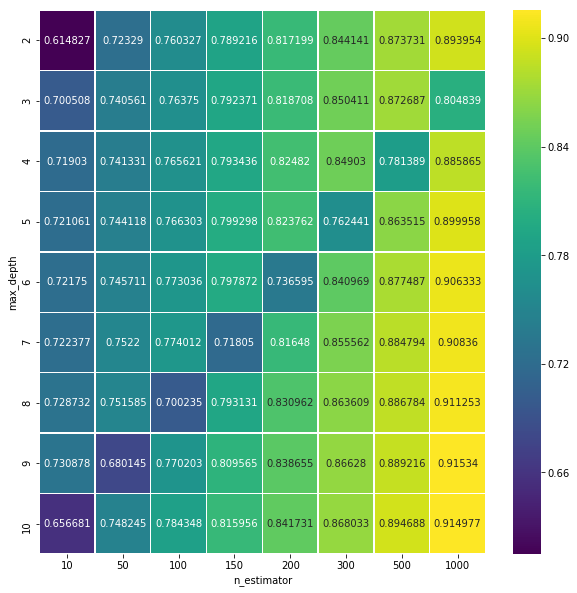

In [0]:
# https://stackoverflow.com/questions/37790429/seaborn-heatmap-using-pandas-dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn
fig, ax = plt.subplots(figsize=(10,10))

result = df_train_data.pivot(index='max_depth', columns='n_estimator', values='auc_score')
 
sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=.5,ax=ax)
plt.show()

### Heat maps with rows as n_estimators, columns as max_depth, and values inside the cell representing AUC Score(CV data Data)

In [0]:
lis_cv_data=[]
count_cv=0

for i in n_estimators_range:
  for j in max_depth_range:
    lis_cv_data.append((grid_search.cv_results_['mean_test_score'][count_cv],j,i))
    count_cv+=1


    

In [0]:
df_cv_data=pd.DataFrame(data=lis_cv_data,columns=['auc_score','max_depth','n_estimator'])


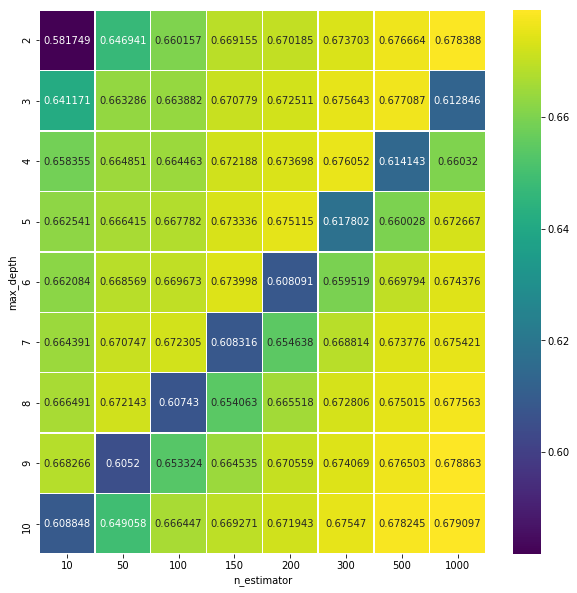

In [0]:
# https://stackoverflow.com/questions/37790429/seaborn-heatmap-using-pandas-dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn
fig, ax = plt.subplots(figsize=(10,10))

result = df_cv_data.pivot(index='max_depth', columns='n_estimator', values='auc_score')
 
sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=.5,ax=ax)
plt.show()

#### After finding the best hyper parameter, we are training our model-M using the best hyper-param.And, finding the AUC on test data and plotting the ROC curve on both train and test using model-M.

In [0]:
#here best hyper parameter (max_depth) 
best_n_estimators=1000
best_max_depth= 10


### Finding the AUC on test data and plotting the ROC curve on both train and test using model-M

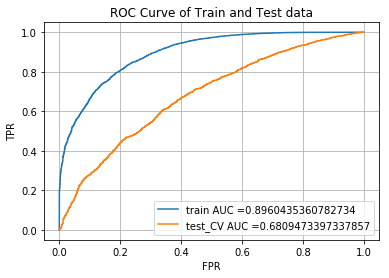

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

RF_clf=RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth,random_state=0,class_weight ='balanced')
RF_clf.fit(X_tr, y_train) 
#svm_clf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred =RF_clf.predict_proba(X_tr)[:,1]
y_test_pred = RF_clf.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test_CV AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve of Train and Test data")
plt.grid()
plt.show()

### Confusion matrix of Train data

the maximum value of tpr*(1-fpr) 0.6470443324546667 for threshold 0.515


Text(0.5, 24.0, 'Predicted label')

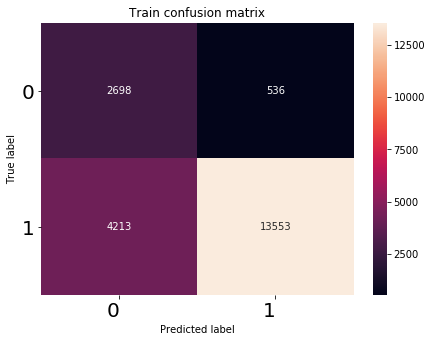

In [0]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(7,5))
cm_train=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
heatmap = sns.heatmap(cm_train, annot=True, fmt="d")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title("Train confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')


### Confusion matrix of Test data

the maximum value of tpr*(1-fpr) 0.40218311297901527 for threshold 0.531


Text(0.5, 24.0, 'Predicted label')

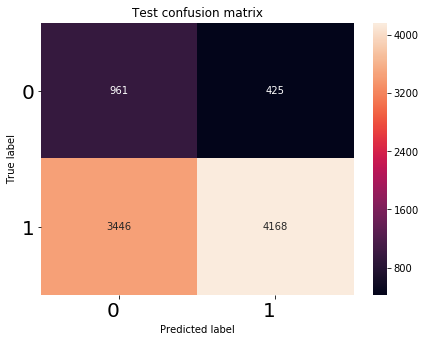

In [0]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

cm_test=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
fig = plt.figure(figsize=(7,5))
heatmap = sns.heatmap(cm_test, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title('Test confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### 2.4.3 Applying Random Forests on AVG W2V,<font color='red'> SET 3</font>

In [0]:
# Please write all the code with proper documentation

## Encoding project_title (AVG W2V)

In [0]:
# Train your own Word2Vec model using your own text corpus
list_of_sentance=[]
for sentance in x_train['preprocessed_project_title']:
    list_of_sentance.append(sentance.split())

In [0]:
w2v_model=Word2Vec(list_of_sentance,min_count=5,size=50, workers=4)

In [87]:
#Building Vocab using x_train['project_title']
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  2062
sample words  ['read', 'hands', 'on', 'learning', 'best', 'math', 'support', 'kindergarten', 'digital', 'literacy', 'engaging', 'students', '21st', 'century', 'classroom', 'feeling', 'flexible', 'future', 'engineers', 'need', 'tools', 'effective', 'building', 'great', 'science', 'for', 'pre', 'k', 'ink', 'me', 'printer', 'needed', 'wobble', 'while', 'we', 'work', 'bringing', 'ideas', 'life', 'get', 'your', 'creating', 'lifelong', 'readers', 'the', 'fine', 'art', 'printing', 'arts', 'steam']


In [0]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))



100%|██████████| 21000/21000 [00:01<00:00, 18169.52it/s]

21000
50


In [0]:
x_train_AVG_W2V_project_title=np.array(sent_vectors)

In [0]:
x_train_AVG_W2V_project_title.shape

(21000, 50)

In [0]:
#Avg W2V of x_test

In [0]:
# Train your own Word2Vec model using your own text corpus
list_of_sentance=[]
for sentance in x_test['preprocessed_project_title']:
    list_of_sentance.append(sentance.split())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|██████████| 9000/9000 [00:00<00:00, 18245.05it/s]

9000
50


In [0]:
x_test_AVG_W2V_project_title=np.array(sent_vectors)
x_test_AVG_W2V_project_title.shape

(9000, 50)

In [0]:
print(x_train_AVG_W2V_project_title.shape,y_train.shape)
print(x_test_AVG_W2V_project_title.shape,y_test.shape)

(21000, 50) (21000,)
(9000, 50) (9000,)


### Encoding essay (AVG W2V)

In [0]:
# Train your own Word2Vec model using your own text corpus
list_of_sentance=[]
for sentance in x_train['preprocessed_essays']:
    list_of_sentance.append(sentance.split())

In [0]:
w2v_model=Word2Vec(list_of_sentance,min_count=5,size=50, workers=4)

In [90]:
#Building Vocab using x_train['essay']
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  12269
sample words  ['our', 'school', 'located', 'rural', 'community', 'a', 'large', 'population', 'students', 'receive', 'free', 'reduced', 'lunch', 'we', 'title', 'one', 'services', 'reading', 'support', 'english', 'language', 'learners', 'classroom', 'inclusion', 'stay', 'general', 'education', 'entire', 'day', 'this', 'first', 'year', 'consists', '20', '4th', 'grade', 'total', 'two', 'teachers', 'aide', 'throughout', 'of', 'five', 'special', 'receives', 'esl', 'percentage', 'class', 'receiving', 'even']


In [0]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))


100%|██████████| 21000/21000 [01:20<00:00, 260.83it/s]

21000
50


In [0]:
x_train_AVG_W2V_essay=np.array(sent_vectors)
x_train_AVG_W2V_essay.shape

(21000, 50)

In [0]:
#AVG_W2V x_test
list_of_sentance=[]
for sentance in x_test['preprocessed_essays']:
    list_of_sentance.append(sentance.split())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))


100%|██████████| 9000/9000 [00:35<00:00, 252.97it/s]

9000
50


In [0]:
x_test_AVG_W2V_essay=np.array(sent_vectors)
x_test_AVG_W2V_essay.shape

(9000, 50)

In [0]:
print(x_train_AVG_W2V_essay.shape,y_train.shape)
print(x_test_AVG_W2V_essay.shape,y_test.shape)

(21000, 50) (21000,)
(9000, 50) (9000,)


### Concatinating all the features

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_AVG_W2V = np.hstack((x_train_AVG_W2V_essay,x_train_AVG_W2V_project_title,df_train_state_rc,df_train_teacher_prefix_rc,df_train_clean_categories_rc,df_train_clean_subcategories_rc,df_train_project_grade_category_rc,x_train_quantity_norm,x_train_price_norm,x_train_teacher_project_norm))
X_te_AVG_W2V = np.hstack((x_test_AVG_W2V_essay,x_test_AVG_W2V_project_title,df_test_state_rc,df_test_teacher_prefix_rc,df_test_clean_categories_rc,df_test_clean_subcategories_rc,df_test_project_grade_category_rc,x_test_quantity_norm,x_test_price_norm,x_test_teacher_project_norm))

print("Final Data matrix")
print(X_tr_AVG_W2V.shape, y_train.shape)
print(X_te_AVG_W2V.shape, y_test.shape)
print("="*100)




Final Data matrix
(21000, 113) (21000,)
(9000, 113) (9000,)


## Applying Random Forest


### 1. Find the best hyper parameter which results in the maximum AUC value

### Find the best hyper paramter using k-fold cross validation (or) simple cross validation data

### 2. K-fold cross validation


In [0]:
#Searching optimal value of max_depth in Decision Tree

K_score=[] # creating list that stores average scores for each max_depth_range 
for alpha in n_estimators_range:
  for k in max_depth_range:
    RF_clf=RandomForestClassifier(n_estimators=alpha, max_depth=k,n_jobs=-1,random_state=0,class_weight ='balanced')# passing values of k in this classifier
    scores=cross_val_score(RF_clf,X_tr,y_train,cv=5,scoring='roc_auc') #storing the values of accuracy in scores list
    print("auc score=",scores.mean(),"max_depth_range =",k,"n_estimator =",alpha)
    K_score.append(scores.mean()) # appending the mean score of each value of max_depth_range


auc score= 0.6108039561649921 max_depth_range = 2 n_estimator = 10
auc score= 0.6223574030438349 max_depth_range = 3 n_estimator = 10
auc score= 0.6300724613668971 max_depth_range = 4 n_estimator = 10
auc score= 0.6323883038827033 max_depth_range = 5 n_estimator = 10
auc score= 0.6385373077128103 max_depth_range = 6 n_estimator = 10
auc score= 0.6281941757219769 max_depth_range = 7 n_estimator = 10
auc score= 0.6176498666166625 max_depth_range = 8 n_estimator = 10
auc score= 0.619817334706337 max_depth_range = 9 n_estimator = 10
auc score= 0.6151874224203733 max_depth_range = 10 n_estimator = 10
auc score= 0.6334910608026256 max_depth_range = 2 n_estimator = 50
auc score= 0.6403771622900825 max_depth_range = 3 n_estimator = 50
auc score= 0.6485987229608997 max_depth_range = 4 n_estimator = 50
auc score= 0.6524061710812141 max_depth_range = 5 n_estimator = 50
auc score= 0.6547431193425763 max_depth_range = 6 n_estimator = 50
auc score= 0.6525575686115472 max_depth_range = 7 n_estimator 

## 3. GridSearchCV

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
RF_clf=RandomForestClassifier(n_estimators=100, max_depth=2,n_jobs=-1,random_state=0,class_weight ='balanced')
parameters = {'n_estimators':n_estimators_range,    
              'max_depth': max_depth_range
             }

In [0]:
grid_search = GridSearchCV(RF_clf, parameters, cv=3, scoring='roc_auc',n_jobs=-1,verbose=2,return_train_score=True)
grid_search.fit(X_tr, y_train) 


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 48.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=2,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='war

In [0]:
# examine the best model
print("Best Score=",grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)



Best Score= 0.6595960326963366
{'max_depth': 7, 'n_estimators': 500}
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=-1, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)


## Representation of results


#### You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure seaborn heat maps with rows as n_estimators, columns as max_depth, and values inside the cell representing AUC Score


### Heat maps with rows as n_estimators, columns as max_depth, and values inside the cell representing AUC Score (Train Data)


In [0]:
lis_train_data=[]
count_train=0

for i in n_estimators_range:
  for j in max_depth_range:
    lis_train_data.append((grid_search.cv_results_['mean_train_score'][count_train],j,i))
    count_train+=1


    

In [0]:
df_train_data=pd.DataFrame(data=lis_train_data,columns=['auc_score','max_depth','n_estimator'])


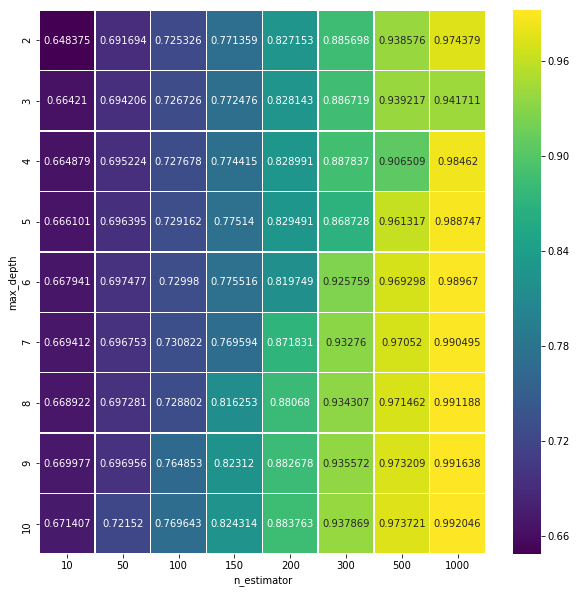

In [0]:
# https://stackoverflow.com/questions/37790429/seaborn-heatmap-using-pandas-dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn
fig, ax = plt.subplots(figsize=(10,10))

result = df_train_data.pivot(index='max_depth', columns='n_estimator', values='auc_score')
 
sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=.5,ax=ax)
plt.show()

### Heat maps with rows as n_estimators, columns as max_depth, and values inside the cell representing AUC Score(CV data Data)

In [0]:
lis_cv_data=[]
count_cv=0

for i in n_estimators_range:
  for j in max_depth_range:
    lis_cv_data.append((grid_search.cv_results_['mean_test_score'][count_cv],j,i))
    count_cv+=1


    

In [0]:
df_cv_data=pd.DataFrame(data=lis_cv_data,columns=['auc_score','max_depth','n_estimator'])


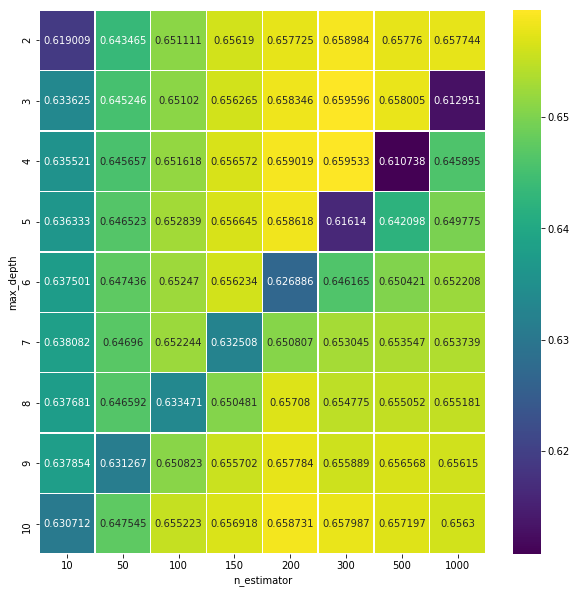

In [0]:
# https://stackoverflow.com/questions/37790429/seaborn-heatmap-using-pandas-dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn
fig, ax = plt.subplots(figsize=(10,10))

result = df_cv_data.pivot(index='max_depth', columns='n_estimator', values='auc_score')
 
sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=.5,ax=ax)
plt.show()

#### After finding the best hyper parameter, we are training our model-M using the best hyper-param.And, finding the AUC on test data and plotting the ROC curve on both train and test using model-M.

In [0]:
#here best hyper parameter (max_depth) 
best_n_estimators=500
best_max_depth=7


### Finding the AUC on test data and plotting the ROC curve on both train and test using model-M

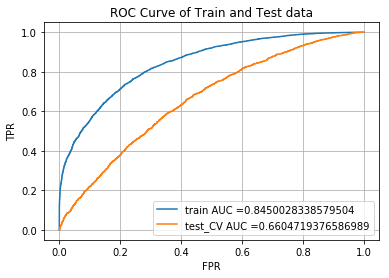

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

RF_clf=RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth,random_state=0,class_weight ='balanced')
RF_clf.fit(X_tr, y_train) 
#svm_clf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred =RF_clf.predict_proba(X_tr)[:,1]
y_test_pred = RF_clf.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test_CV AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve of Train and Test data")
plt.grid()
plt.show()

### Confusion matrix of Train data

the maximum value of tpr*(1-fpr) 0.5785847154352004 for threshold 0.519


Text(0.5, 24.0, 'Predicted label')

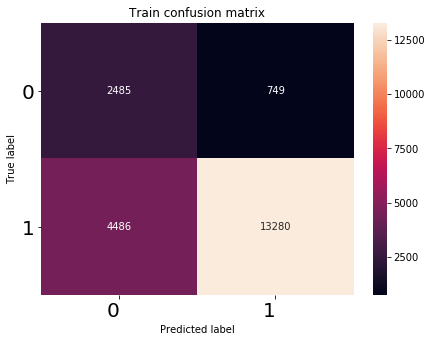

In [0]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(7,5))
cm_train=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
heatmap = sns.heatmap(cm_train, annot=True, fmt="d")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title("Train confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')


### Confusion matrix of Test data

the maximum value of tpr*(1-fpr) 0.3840544360638923 for threshold 0.54


Text(0.5, 24.0, 'Predicted label')

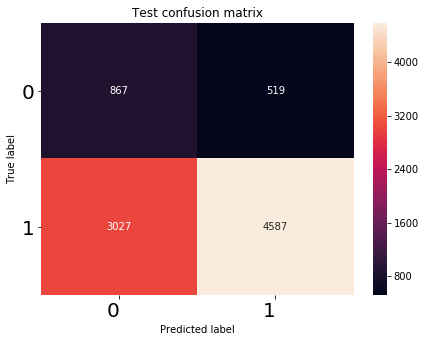

In [0]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

cm_test=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
fig = plt.figure(figsize=(7,5))
heatmap = sns.heatmap(cm_test, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title('Test confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### 2.4.4 Applying Random Forests on TFIDF W2V,<font color='red'> SET 4</font>

In [0]:
# Please write all the code with proper documentation

## Encoding project_title (TFIDF W2V)

In [0]:
# Train your own Word2Vec model using your own text corpus
list_of_sentance=[]
for sentance in x_train['preprocessed_project_title']:
    list_of_sentance.append(sentance.split())
    

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [93]:
# TF-IDF weighted Word2Vec
tfidf_feat = tfidf_model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentance): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|██████████| 21000/21000 [00:12<00:00, 1734.03it/s]


In [94]:
x_train_TFIDF_W2V_project_title=np.array(tfidf_sent_vectors)
print(x_train_TFIDF_W2V_project_title.shape,y_train.shape)

(21000, 50) (21000,)


In [0]:
list_of_sentance=[]
for sentance in x_test['preprocessed_project_title']:
    list_of_sentance.append(sentance.split())

In [96]:
# TF-IDF weighted Word2Vec
tfidf_feat = tfidf_model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentance): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|██████████| 9000/9000 [00:05<00:00, 1769.64it/s]


In [97]:
x_test_TFIDF_W2V_project_title=np.array(tfidf_sent_vectors)
print(x_test_TFIDF_W2V_project_title.shape,y_test.shape)

(9000, 50) (9000,)


In [98]:
print(x_train_TFIDF_W2V_project_title.shape,y_train.shape)
print(x_test_TFIDF_W2V_project_title.shape,y_test.shape)


(21000, 50) (21000,)
(9000, 50) (9000,)


## Encoding essay(TFIDF W2V)

In [0]:
# Train your own Word2Vec model using your own text corpus
list_of_sentance=[]
for sentance in x_train['preprocessed_essays']:
    list_of_sentance.append(sentance.split())
    

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [101]:
# TF-IDF weighted Word2Vec
tfidf_feat = tfidf_model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentance): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|██████████| 21000/21000 [22:17<00:00, 15.70it/s]


In [102]:
x_train_TFIDF_W2V_essay=np.array(tfidf_sent_vectors)
print(x_train_TFIDF_W2V_essay.shape,y_train.shape)

(21000, 50) (21000,)


In [0]:
list_of_sentance=[]
for sentance in x_test['preprocessed_essays']:
    list_of_sentance.append(sentance.split())

In [104]:
# TF-IDF weighted Word2Vec
tfidf_feat = tfidf_model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentance): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|██████████| 9000/9000 [09:35<00:00, 15.65it/s]


In [105]:
x_test_TFIDF_W2V_essay=np.array(tfidf_sent_vectors)
print(x_test_TFIDF_W2V_essay.shape,y_test.shape)

(9000, 50) (9000,)


In [106]:
print(x_train_TFIDF_W2V_essay.shape,y_train.shape)
print(x_test_TFIDF_W2V_essay.shape,y_test.shape)

(21000, 50) (21000,)
(9000, 50) (9000,)


### Concatinating all the features


In [107]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_TFIDF_W2V = np.hstack((x_train_TFIDF_W2V_essay,x_train_TFIDF_W2V_project_title,df_train_state_rc,df_train_teacher_prefix_rc,df_train_clean_categories_rc,df_train_clean_subcategories_rc,df_train_project_grade_category_rc,x_train_quantity_norm,x_train_price_norm,x_train_teacher_project_norm))
X_te_TFIDF_W2V = np.hstack((x_test_TFIDF_W2V_essay,x_test_TFIDF_W2V_project_title,df_test_state_rc,df_test_teacher_prefix_rc,df_test_clean_categories_rc,df_test_clean_subcategories_rc,df_test_project_grade_category_rc,x_test_quantity_norm,x_test_price_norm,x_test_teacher_project_norm))

print("Final Data matrix")
print(X_tr_TFIDF_W2V.shape, y_train.shape)
print(X_te_TFIDF_W2V.shape, y_test.shape)
print("="*100)




Final Data matrix
(21000, 113) (21000,)
(9000, 113) (9000,)


## Applying Random Forest


### 1. Find the best hyper parameter which results in the maximum AUC value

### Find the best hyper paramter using k-fold cross validation (or) simple cross validation data


### 2. K-fold cross validation


In [0]:
#Searching optimal value of max_depth in Decision Tree

K_score=[] # creating list that stores average scores for each max_depth_range 
for alpha in n_estimators_range:
  for k in max_depth_range:
    RF_clf=RandomForestClassifier(n_estimators=alpha, max_depth=k,random_state=0,class_weight ='balanced')# passing values of k in this classifier
    scores=cross_val_score(RF_clf,X_tr,y_train,cv=5,scoring='roc_auc') #storing the values of accuracy in scores list
    print("auc score=",scores.mean(),"max_depth_range =",k,"n_estimator =",alpha)
    K_score.append(scores.mean()) # appending the mean score of each value of max_depth_range


auc score= 0.633646329440203 max_depth_range = 2 n_estimator = 10
auc score= 0.6414651052486676 max_depth_range = 3 n_estimator = 10
auc score= 0.6426431846220353 max_depth_range = 4 n_estimator = 10
auc score= 0.6514586854759531 max_depth_range = 5 n_estimator = 10
auc score= 0.649124772988643 max_depth_range = 6 n_estimator = 10
auc score= 0.6456033438552554 max_depth_range = 7 n_estimator = 10
auc score= 0.6409285500148687 max_depth_range = 8 n_estimator = 10
auc score= 0.6391842056436394 max_depth_range = 9 n_estimator = 10
auc score= 0.6386972568740592 max_depth_range = 10 n_estimator = 10
auc score= 0.6426325599380378 max_depth_range = 2 n_estimator = 50
auc score= 0.6519695561574 max_depth_range = 3 n_estimator = 50
auc score= 0.6572416362592317 max_depth_range = 4 n_estimator = 50
auc score= 0.6646351623411026 max_depth_range = 5 n_estimator = 50
auc score= 0.6680855934900081 max_depth_range = 6 n_estimator = 50
auc score= 0.6656418231811119 max_depth_range = 7 n_estimator = 50

## 3. GridSearchCV

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
RF_clf=RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0,class_weight ='balanced')
parameters = {'n_estimators':n_estimators_range,    
              'max_depth': max_depth_range
             }

In [0]:
grid_search = GridSearchCV(RF_clf, parameters, cv=3, scoring='roc_auc',n_jobs=-1,verbose=2,return_train_score=True)
grid_search.fit(X_tr, y_train)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 47.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=2,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='w

In [0]:
# examine the best model
print("Best Score=",grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)



Best Score= 0.6734949206725152
{'max_depth': 7, 'n_estimators': 1000}
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)


## Representation of results

####You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure seaborn heat maps with rows as n_estimators, columns as max_depth, and values inside the cell representing AUC Score

### Heat maps with rows as n_estimators, columns as max_depth, and values inside the cell representing AUC Score (Train Data)


In [0]:
lis_train_data=[]
count_train=0

for i in n_estimators_range:
  for j in max_depth_range:
    lis_train_data.append((grid_search.cv_results_['mean_train_score'][count_train],j,i))
    count_train+=1


    

In [0]:
df_train_data=pd.DataFrame(data=lis_train_data,columns=['auc_score','max_depth','n_estimator'])


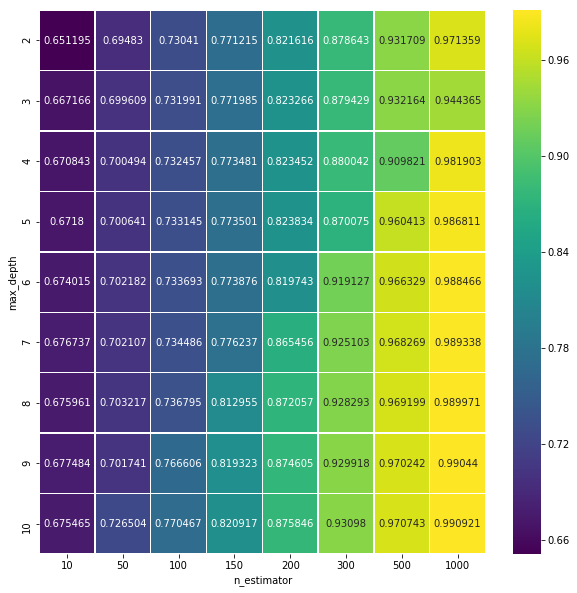

In [0]:
# https://stackoverflow.com/questions/37790429/seaborn-heatmap-using-pandas-dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn
fig, ax = plt.subplots(figsize=(10,10))

result = df_train_data.pivot(index='max_depth', columns='n_estimator', values='auc_score')
 
sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=.5,ax=ax)
plt.show()

### Heat maps with rows as n_estimators, columns as max_depth, and values inside the cell representing AUC Score(CV data Data)

In [0]:
lis_cv_data=[]
count_cv=0

for i in n_estimators_range:
  for j in max_depth_range:
    lis_cv_data.append((grid_search.cv_results_['mean_test_score'][count_cv],j,i))
    count_cv+=1


    

In [0]:
df_cv_data=pd.DataFrame(data=lis_cv_data,columns=['auc_score','max_depth','n_estimator'])


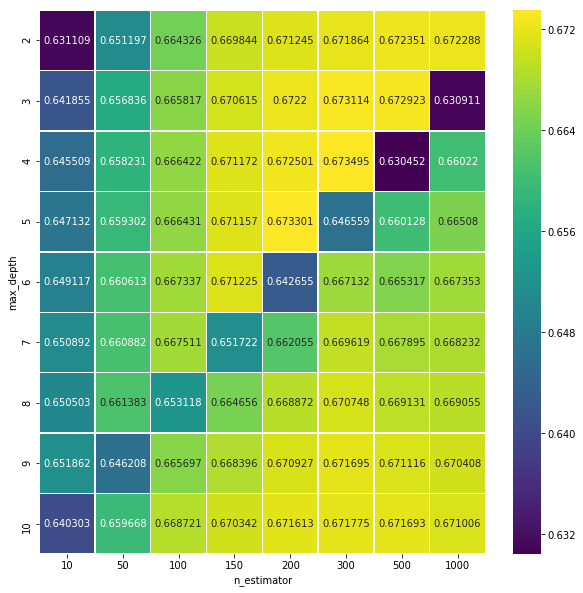

In [0]:
# https://stackoverflow.com/questions/37790429/seaborn-heatmap-using-pandas-dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn
fig, ax = plt.subplots(figsize=(10,10))

result = df_cv_data.pivot(index='max_depth', columns='n_estimator', values='auc_score')
 
sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=.5,ax=ax)
plt.show()

#### After finding the best hyper parameter, we are training our model-M using the best hyper-param.And, finding the AUC on test data and plotting the ROC curve on both train and test using model-M.

In [0]:
#here best hyper parameter (max_depth) 
best_n_estimators=1000
best_max_depth= 7


### Finding the AUC on test data and plotting the ROC curve on both train and test using model-M

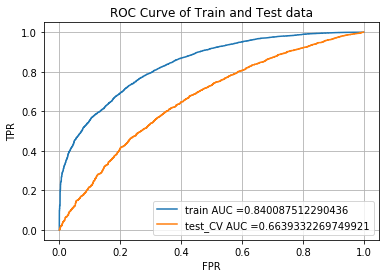

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

RF_clf=RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth,random_state=0,class_weight ='balanced')
RF_clf.fit(X_tr, y_train) 
#svm_clf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred =RF_clf.predict_proba(X_tr)[:,1]
y_test_pred = RF_clf.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test_CV AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve of Train and Test data")
plt.grid()
plt.show()

### Confusion matrix of Train data

the maximum value of tpr*(1-fpr) 0.5641771184541484 for threshold 0.515


Text(0.5, 24.0, 'Predicted label')

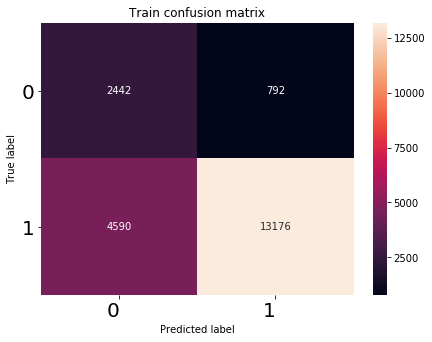

In [0]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(7,5))
cm_train=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
heatmap = sns.heatmap(cm_train, annot=True, fmt="d")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title("Train confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')


### Confusion matrix of Test data

the maximum value of tpr*(1-fpr) 0.39069292497188485 for threshold 0.538


Text(0.5, 24.0, 'Predicted label')

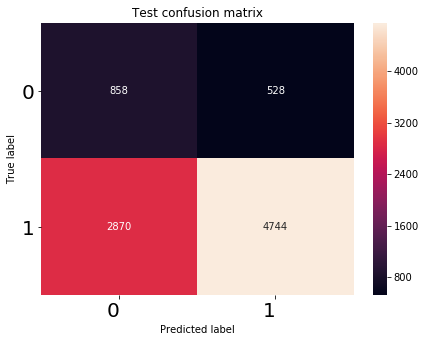

In [0]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

cm_test=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
fig = plt.figure(figsize=(7,5))
heatmap = sns.heatmap(cm_test, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title('Test confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

<h2>2.5 Applying GBDT</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.5.1 Applying XGBOOST on BOW,<font color='red'> SET 1</font>

### 1. Find the best hyper parameter which results in the maximum AUC value
### Find the best hyper paramter using k-fold cross validation (or) simple cross validation data


#### 2. K-fold cross validation


In [0]:
# Please write all the code with proper documentation

In [0]:
import xgboost as xgb

In [0]:
xgb_model=xgb.XGBClassifier(max_depth=3,learning_rate=0.1,n_estimators=10,n_jobs=-1).fit(X_tr_bow,y_train)

In [0]:
print(X_tr_bow.shape, y_train.shape)
print(X_te_bow.shape, y_test.shape)
print("="*100)

(21000, 4746) (21000,)
(9000, 4746) (9000,)


In [0]:
#Searching optimal value of max_depth in Decision Tree

K_score=[] # creating list that stores average scores for each max_depth_range 
for alpha in n_estimators_range:
  for k in max_depth_range:
    xgb_model=xgb.XGBClassifier(max_depth=k,learning_rate=0.1,n_estimators=alpha,n_jobs=-1).fit(X_tr_bow,y_train)# passing values of k in this classifier
    scores=cross_val_score(xgb_model,X_tr_bow,y_train,cv=5,scoring='roc_auc',n_jobs=-1) #storing the values of accuracy in scores list
    print("auc score=",scores.mean(),"max_depth_range =",k,"n_estimator =",alpha)
    K_score.append(scores.mean()) # appending the mean score of each value of max_depth_range


auc score= 0.6000397099743108 max_depth_range = 2 n_estimator = 10
auc score= 0.6110666889200386 max_depth_range = 3 n_estimator = 10
auc score= 0.6192069930910773 max_depth_range = 4 n_estimator = 10
auc score= 0.6223674322600007 max_depth_range = 5 n_estimator = 10
auc score= 0.6237766892503945 max_depth_range = 6 n_estimator = 10
auc score= 0.623227492128843 max_depth_range = 7 n_estimator = 10
auc score= 0.621321298358689 max_depth_range = 8 n_estimator = 10
auc score= 0.6188929733925103 max_depth_range = 9 n_estimator = 10
auc score= 0.6180784823483597 max_depth_range = 10 n_estimator = 10
auc score= 0.6470921305169706 max_depth_range = 2 n_estimator = 50
auc score= 0.6551933359492119 max_depth_range = 3 n_estimator = 50
auc score= 0.6615320216959863 max_depth_range = 4 n_estimator = 50
auc score= 0.658786950248196 max_depth_range = 5 n_estimator = 50
auc score= 0.6610159648265566 max_depth_range = 6 n_estimator = 50
auc score= 0.662178084451645 max_depth_range = 7 n_estimator = 5

## 3. GridSearchCV

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
xgb_model=xgb.XGBClassifier(max_depth=3,learning_rate=0.1,n_estimators=10,n_jobs=-1).fit(X_tr_bow,y_train)
parameters = {  
              'max_depth': max_depth_range,
              'n_estimators':n_estimators_range
             }

In [0]:
grid_search = GridSearchCV(xgb_model, parameters, cv=5, scoring='roc_auc',n_jobs=-1,verbose=2,return_train_score=True)
grid_search.fit(X_tr_bow, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 71.4min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 277.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=10, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 50, 100, 150, 200, 300, 500,
                          

In [0]:
# examine the best model
print("Best Score=",grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)



Best Score= 0.6904547210069544
{'max_depth': 2, 'n_estimators': 500}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


### Representation of results

#### You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure seaborn heat maps with rows as n_estimators, columns as max_depth, and values inside the cell representing AUC Score

### Heat maps with rows as n_estimators, columns as max_depth, and values inside the cell representing AUC Score (Train Data)


In [0]:
lis_train_data=[]
count_train=0

for i in n_estimators_range:
  for j in max_depth_range:
    lis_train_data.append((grid_search.cv_results_['mean_train_score'][count_train],j,i))
    count_train+=1


    

In [0]:
df_train_data=pd.DataFrame(data=lis_train_data,columns=['auc_score','max_depth','n_estimator'])


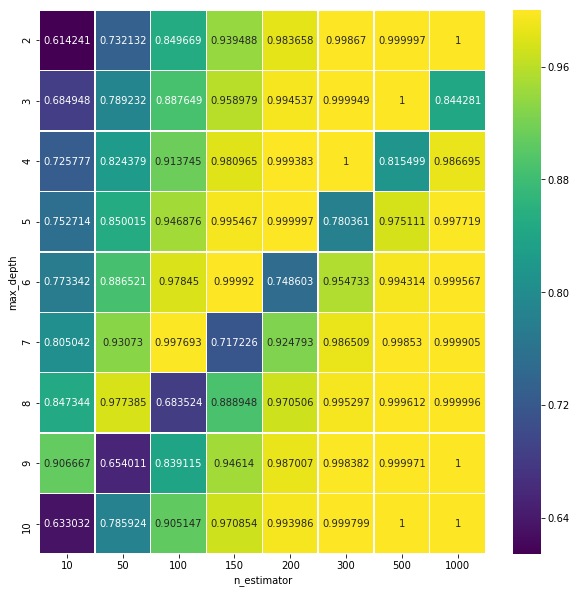

In [0]:
# https://stackoverflow.com/questions/37790429/seaborn-heatmap-using-pandas-dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn
fig, ax = plt.subplots(figsize=(10,10))

result = df_train_data.pivot(index='max_depth', columns='n_estimator', values='auc_score')
 
sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=.5,ax=ax)
plt.show()

### Heat maps with rows as n_estimators, columns as max_depth, and values inside the cell representing AUC Score(CV data Data)

In [0]:
lis_cv_data=[]
count_cv=0

for i in n_estimators_range:
  for j in max_depth_range:
    lis_cv_data.append((grid_search.cv_results_['mean_test_score'][count_cv],j,i))
    count_cv+=1


    

In [0]:
df_cv_data=pd.DataFrame(data=lis_cv_data,columns=['auc_score','max_depth','n_estimator'])


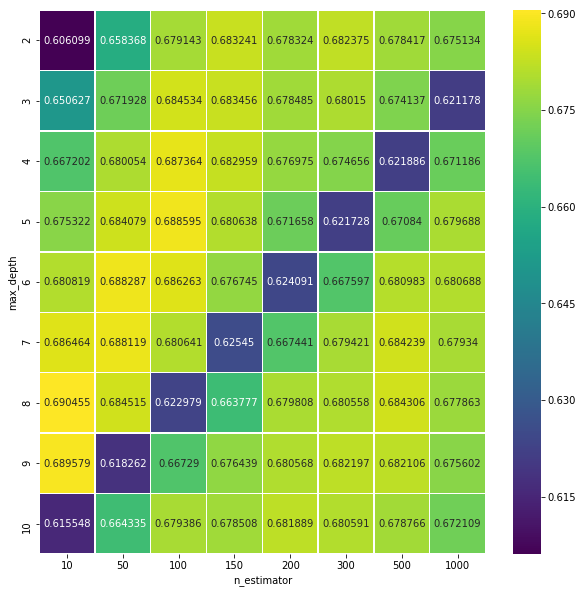

In [0]:
# https://stackoverflow.com/questions/37790429/seaborn-heatmap-using-pandas-dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn
fig, ax = plt.subplots(figsize=(10,10))

result = df_cv_data.pivot(index='max_depth', columns='n_estimator', values='auc_score')
 
sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=.5,ax=ax)
plt.show()

#### After finding the best hyper parameter, we are training our model-M using the best hyper-param.And, finding the AUC on test data and plotting the ROC curve on both train and test using model-M.

In [0]:
#here best hyper parameter (max_depth) 
best_n_estimators=500
best_max_depth= 2


### Finding the AUC on test data and plotting the ROC curve on both train and test using model-M

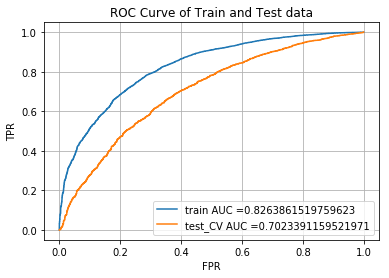

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

xgb_model=xgb.XGBClassifier(max_depth=best_max_depth,learning_rate=0.1,n_estimators=best_n_estimators,n_jobs=-1).fit(X_tr_bow,y_train)
 
#svm_clf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred =xgb_model.predict_proba(X_tr_bow)[:,1]
y_test_pred = xgb_model.predict_proba(X_te_bow)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test_CV AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve of Train and Test data")
plt.grid()
plt.show()

### Confusion matrix of Train data

the maximum value of tpr*(1-fpr) 0.5588523825605892 for threshold 0.828


Text(0.5, 24.0, 'Predicted label')

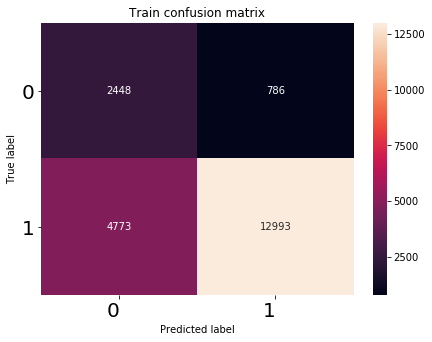

In [0]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(7,5))
cm_train=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
heatmap = sns.heatmap(cm_train, annot=True, fmt="d")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title("Train confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')


### Confusion matrix of Test data

the maximum value of tpr*(1-fpr) 0.42715571793585977 for threshold 0.854


Text(0.5, 24.0, 'Predicted label')

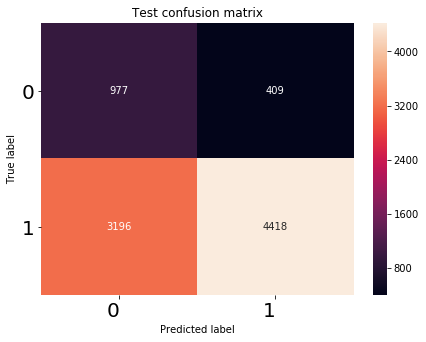

In [0]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

cm_test=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
fig = plt.figure(figsize=(7,5))
heatmap = sns.heatmap(cm_test, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title('Test confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### 2.5.2 Applying XGBOOST on TFIDF,<font color='red'> SET 2</font>

### 1. Find the best hyper parameter which results in the maximum AUC value
### Find the best hyper paramter using k-fold cross validation (or) simple cross validation data


#### 2. K-fold cross validation


In [0]:
# Please write all the code with proper documentation

In [0]:
import xgboost as xgb

In [0]:
xgb_model=xgb.XGBClassifier(max_depth=3,learning_rate=0.1,n_estimators=10,n_jobs=-1).fit(X_tr_tfidf,y_train)

In [0]:
print(X_tr_tfidf.shape, y_train.shape)
print(X_te_tfidf.shape, y_test.shape)
print("="*100)

(21000, 4789) (21000,)
(9000, 4789) (9000,)


In [0]:
#Searching optimal value of max_depth in Decision Tree

K_score=[] # creating list that stores average scores for each max_depth_range 
for alpha in n_estimators_range:
  for k in max_depth_range:
    xgb_model=xgb.XGBClassifier(max_depth=k,learning_rate=0.1,n_estimators=alpha,n_jobs=-1).fit(X_tr_tfidf,y_train)# passing values of k in this classifier
    scores=cross_val_score(xgb_model,X_tr_tfidf,y_train,cv=5,scoring='roc_auc',n_jobs=-1) #storing the values of accuracy in scores list
    print("auc score=",scores.mean(),"max_depth_range =",k,"n_estimator =",alpha)
    K_score.append(scores.mean()) # appending the mean score of each value of max_depth_range


auc score= 0.6177341847639823 max_depth_range = 2 n_estimator = 10
auc score= 0.6237553674968076 max_depth_range = 3 n_estimator = 10
auc score= 0.6257991133319944 max_depth_range = 4 n_estimator = 10
auc score= 0.6270093688085204 max_depth_range = 5 n_estimator = 10
auc score= 0.6279297784534246 max_depth_range = 6 n_estimator = 10
auc score= 0.62960383686838 max_depth_range = 7 n_estimator = 10
auc score= 0.6269335899533153 max_depth_range = 8 n_estimator = 10
auc score= 0.6262785350431642 max_depth_range = 9 n_estimator = 10
auc score= 0.6209981658859908 max_depth_range = 10 n_estimator = 10
auc score= 0.6533653714487919 max_depth_range = 2 n_estimator = 50
auc score= 0.6582891025407885 max_depth_range = 3 n_estimator = 50
auc score= 0.6594439496457255 max_depth_range = 4 n_estimator = 50
auc score= 0.661640239691749 max_depth_range = 5 n_estimator = 50
auc score= 0.6655061990730656 max_depth_range = 6 n_estimator = 50
auc score= 0.6654081123614783 max_depth_range = 7 n_estimator = 

## 3. GridSearchCV

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
xgb_model=xgb.XGBClassifier(max_depth=3,learning_rate=0.1,n_estimators=10,n_jobs=-1).fit(X_tr_tfidf,y_train)
parameters = {  
              'max_depth': max_depth_range,
              'n_estimators':n_estimators_range
             }

In [0]:
grid_search = GridSearchCV(xgb_model, parameters, cv=2, scoring='roc_auc',n_jobs=-1,verbose=2,return_train_score=True)
grid_search.fit(X_tr_tfidf, y_train)


Fitting 2 folds for each of 72 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 171.8min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=10, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 50, 100, 150, 200, 300, 500,
                          

In [0]:
# examine the best model
print("Best Score=",grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)



Best Score= 0.673176446696493
{'max_depth': 2, 'n_estimators': 500}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


### Representation of results

#### You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure seaborn heat maps with rows as n_estimators, columns as max_depth, and values inside the cell representing AUC Score

### Heat maps with rows as n_estimators, columns as max_depth, and values inside the cell representing AUC Score (Train Data)


In [0]:
lis_train_data=[]
count_train=0

for i in n_estimators_range:
  for j in max_depth_range:
    lis_train_data.append((grid_search.cv_results_['mean_train_score'][count_train],j,i))
    count_train+=1


    

In [0]:
df_train_data=pd.DataFrame(data=lis_train_data,columns=['auc_score','max_depth','n_estimator'])


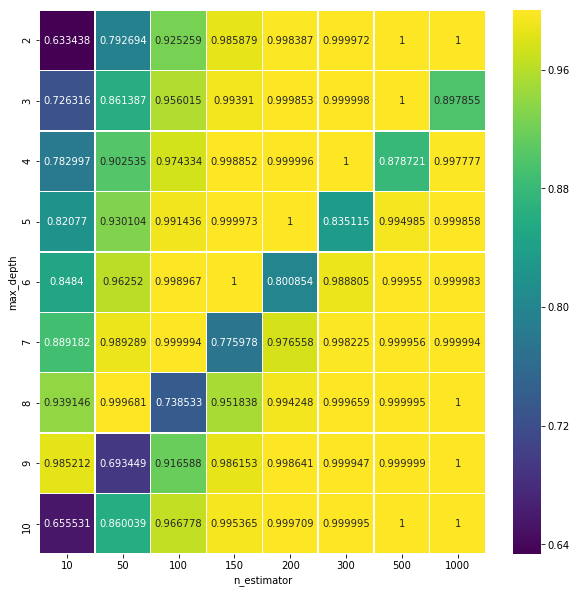

In [0]:
# https://stackoverflow.com/questions/37790429/seaborn-heatmap-using-pandas-dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn
fig, ax = plt.subplots(figsize=(10,10))

result = df_train_data.pivot(index='max_depth', columns='n_estimator', values='auc_score')
 
sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=.5,ax=ax)
plt.show()

### Heat maps with rows as n_estimators, columns as max_depth, and values inside the cell representing AUC Score(CV data Data)

In [0]:
lis_cv_data=[]
count_cv=0

for i in n_estimators_range:
  for j in max_depth_range:
    lis_cv_data.append((grid_search.cv_results_['mean_test_score'][count_cv],j,i))
    count_cv+=1


    

In [0]:
df_cv_data=pd.DataFrame(data=lis_cv_data,columns=['auc_score','max_depth','n_estimator'])


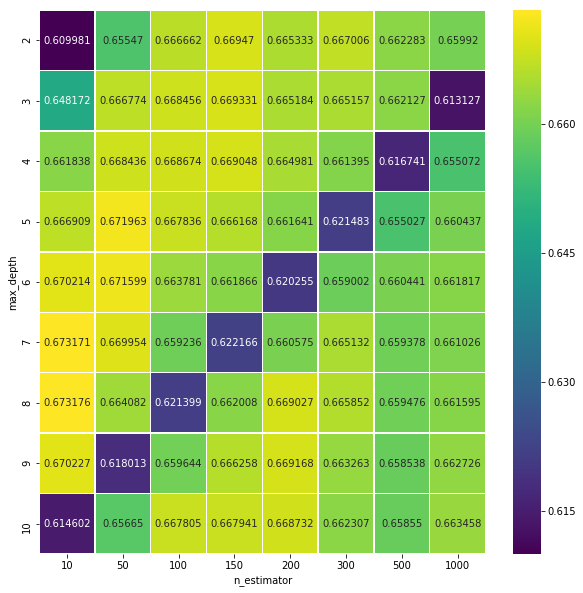

In [0]:
# https://stackoverflow.com/questions/37790429/seaborn-heatmap-using-pandas-dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn
fig, ax = plt.subplots(figsize=(10,10))

result = df_cv_data.pivot(index='max_depth', columns='n_estimator', values='auc_score')
 
sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=.5,ax=ax)
plt.show()

#### After finding the best hyper parameter, we are training our model-M using the best hyper-param.And, finding the AUC on test data and plotting the ROC curve on both train and test using model-M.

In [0]:
#here best hyper parameter (max_depth) 
best_n_estimators=500
best_max_depth= 2


### Finding the AUC on test data and plotting the ROC curve on both train and test using model-M

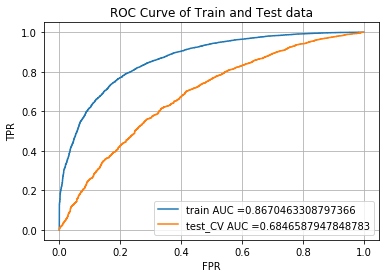

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

xgb_model=xgb.XGBClassifier(max_depth=best_max_depth,learning_rate=0.1,n_estimators=best_n_estimators,n_jobs=-1).fit(X_tr_tfidf,y_train)
 
#svm_clf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred =xgb_model.predict_proba(X_tr_tfidf)[:,1]
y_test_pred = xgb_model.predict_proba(X_te_tfidf)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test_CV AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve of Train and Test data")
plt.grid()
plt.show()

### Confusion matrix of Train data


the maximum value of tpr*(1-fpr) 0.6178114916716739 for threshold 0.816


Text(0.5, 24.0, 'Predicted label')

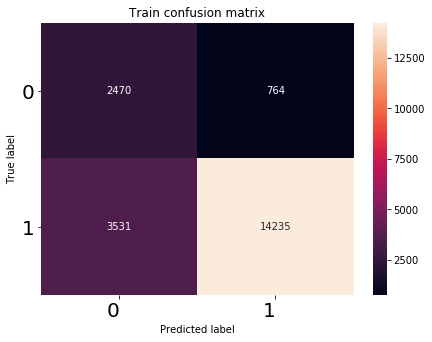

In [0]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(7,5))
cm_train=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
heatmap = sns.heatmap(cm_train, annot=True, fmt="d")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title("Train confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')


### Confusion matrix of Test data

the maximum value of tpr*(1-fpr) 0.4088145896656535 for threshold 0.844


Text(0.5, 24.0, 'Predicted label')

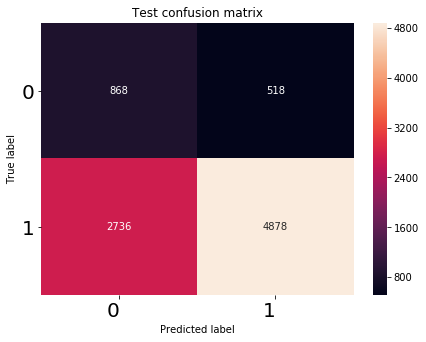

In [0]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

cm_test=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
fig = plt.figure(figsize=(7,5))
heatmap = sns.heatmap(cm_test, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title('Test confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### 2.5.3 Applying XGBOOST on AVG W2V,<font color='red'> SET 3</font>

### 1. Find the best hyper parameter which results in the maximum AUC value
### Find the best hyper paramter using k-fold cross validation (or) simple cross validation data


#### 2. K-fold cross validation


In [0]:
# Please write all the code with proper documentation

In [0]:
import xgboost as xgb

In [0]:
xgb_model=xgb.XGBClassifier(max_depth=3,learning_rate=0.1,n_estimators=10,n_jobs=-1).fit(X_tr_AVG_W2V,y_train)

In [0]:
print("Final Data matrix")
print(X_tr_AVG_W2V.shape, y_train.shape)
print(X_te_AVG_W2V.shape, y_test.shape)
print("="*100)


Final Data matrix
(21000, 113) (21000,)
(9000, 113) (9000,)


In [0]:
#Searching optimal value of max_depth in Decision Tree

K_score=[] # creating list that stores average scores for each max_depth_range 
for alpha in n_estimators_range:
  for k in max_depth_range:
    xgb_model=xgb.XGBClassifier(max_depth=k,learning_rate=0.1,n_estimators=alpha,n_jobs=-1).fit(X_tr_AVG_W2V,y_train)# passing values of k in this classifier
    scores=cross_val_score(xgb_model,X_tr_AVG_W2V,y_train,cv=3,scoring='roc_auc',n_jobs=-1) #storing the values of accuracy in scores list
    print("auc score=",scores.mean(),"max_depth_range =",k,"n_estimator =",alpha)
    K_score.append(scores.mean()) # appending the mean score of each value of max_depth_range


auc score= 0.6122194694708807 max_depth_range = 2 n_estimator = 10
auc score= 0.6229245758663909 max_depth_range = 3 n_estimator = 10
auc score= 0.6287028995995562 max_depth_range = 4 n_estimator = 10
auc score= 0.6307898892571059 max_depth_range = 5 n_estimator = 10
auc score= 0.6293263936012525 max_depth_range = 6 n_estimator = 10
auc score= 0.6274027832864134 max_depth_range = 7 n_estimator = 10
auc score= 0.627184082622641 max_depth_range = 8 n_estimator = 10
auc score= 0.6276384797878501 max_depth_range = 9 n_estimator = 10
auc score= 0.6270869374429947 max_depth_range = 10 n_estimator = 10
auc score= 0.6516708814255493 max_depth_range = 2 n_estimator = 50
auc score= 0.6617828304758397 max_depth_range = 3 n_estimator = 50
auc score= 0.6631979493464514 max_depth_range = 4 n_estimator = 50
auc score= 0.6621158026933103 max_depth_range = 5 n_estimator = 50
auc score= 0.6637965631126725 max_depth_range = 6 n_estimator = 50
auc score= 0.6606588077495589 max_depth_range = 7 n_estimator 

## 3. GridSearchCV

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
xgb_model=xgb.XGBClassifier(max_depth=3,learning_rate=0.1,n_estimators=10,n_jobs=-1).fit(X_tr_AVG_W2V,y_train)
parameters = {  
              'max_depth': max_depth_range,
              'n_estimators':n_estimators_range
             }

In [0]:
grid_search = GridSearchCV(xgb_model, parameters, cv=2, scoring='roc_auc',n_jobs=-1,verbose=2,return_train_score=True)
grid_search.fit(X_tr_AVG_W2V, y_train)


Fitting 2 folds for each of 72 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 76.3min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=10, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 50, 100, 150, 200, 300, 500,
                          

In [0]:
# examine the best model
print("Best Score=",grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)



Best Score= 0.6657312603180312
{'max_depth': 2, 'n_estimators': 200}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


### Representation of results

#### You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure seaborn heat maps with rows as n_estimators, columns as max_depth, and values inside the cell representing AUC Score

### Heat maps with rows as n_estimators, columns as max_depth, and values inside the cell representing AUC Score (Train Data)


In [0]:
lis_train_data=[]
count_train=0

for i in n_estimators_range:
  for j in max_depth_range:
    lis_train_data.append((grid_search.cv_results_['mean_train_score'][count_train],j,i))
    count_train+=1


    

In [0]:
df_train_data=pd.DataFrame(data=lis_train_data,columns=['auc_score','max_depth','n_estimator'])


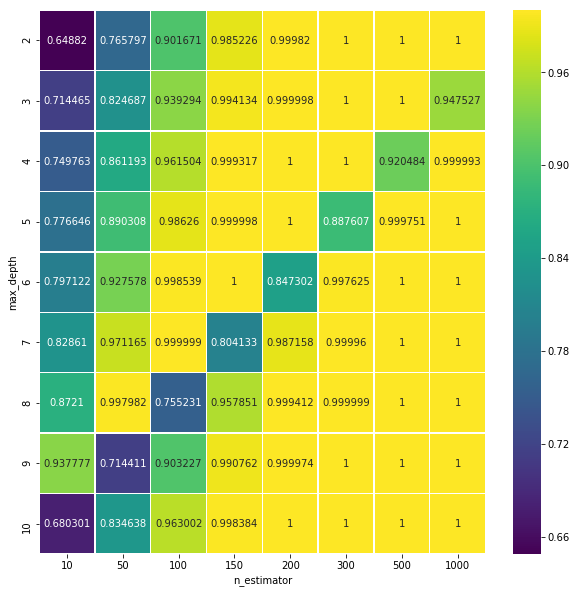

In [0]:
# https://stackoverflow.com/questions/37790429/seaborn-heatmap-using-pandas-dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn
fig, ax = plt.subplots(figsize=(10,10))

result = df_train_data.pivot(index='max_depth', columns='n_estimator', values='auc_score')
 
sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=.5,ax=ax)
plt.show()

### Heat maps with rows as n_estimators, columns as max_depth, and values inside the cell representing AUC Score(CV data Data)

In [0]:
lis_cv_data=[]
count_cv=0

for i in n_estimators_range:
  for j in max_depth_range:
    lis_cv_data.append((grid_search.cv_results_['mean_test_score'][count_cv],j,i))
    count_cv+=1


    

In [0]:
df_cv_data=pd.DataFrame(data=lis_cv_data,columns=['auc_score','max_depth','n_estimator'])


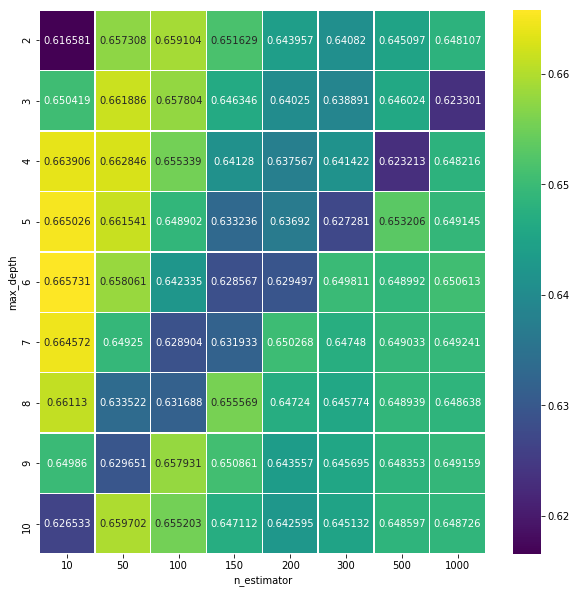

In [0]:
# https://stackoverflow.com/questions/37790429/seaborn-heatmap-using-pandas-dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn
fig, ax = plt.subplots(figsize=(10,10))

result = df_cv_data.pivot(index='max_depth', columns='n_estimator', values='auc_score')
 
sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=.5,ax=ax)
plt.show()

#### After finding the best hyper parameter, we are training our model-M using the best hyper-param.And, finding the AUC on test data and plotting the ROC curve on both train and test using model-M.

In [0]:
#here best hyper parameter (max_depth) 
best_n_estimators=200
best_max_depth= 2


### Finding the AUC on test data and plotting the ROC curve on both train and test using model-M

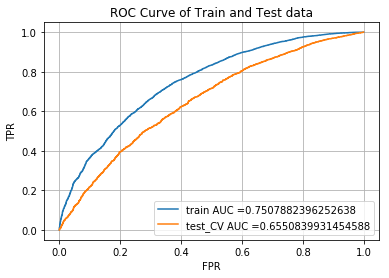

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

xgb_model=xgb.XGBClassifier(max_depth=best_max_depth,learning_rate=0.1,n_estimators=best_n_estimators,n_jobs=-1).fit(X_tr_AVG_W2V,y_train)
 
#svm_clf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred =xgb_model.predict_proba(X_tr_AVG_W2V)[:,1]
y_test_pred = xgb_model.predict_proba(X_te_AVG_W2V)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test_CV AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve of Train and Test data")
plt.grid()
plt.show()

### Confusion matrix of Train data


the maximum value of tpr*(1-fpr) 0.4685539930872107 for threshold 0.855


Text(0.5, 24.0, 'Predicted label')

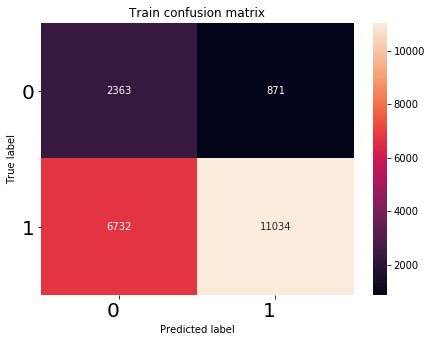

In [0]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(7,5))
cm_train=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
heatmap = sns.heatmap(cm_train, annot=True, fmt="d")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title("Train confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')


### Confusion matrix of Test data

the maximum value of tpr*(1-fpr) 0.3749442338882844 for threshold 0.855


Text(0.5, 24.0, 'Predicted label')

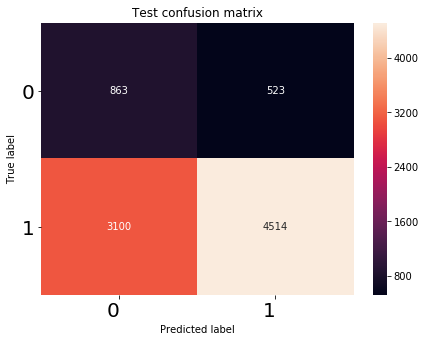

In [0]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

cm_test=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
fig = plt.figure(figsize=(7,5))
heatmap = sns.heatmap(cm_test, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title('Test confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### 2.5.4 Applying XGBOOST on TFIDF W2V,<font color='red'> SET 4</font>

### 1. Find the best hyper parameter which results in the maximum AUC value
### Find the best hyper paramter using k-fold cross validation (or) simple cross validation data


#### 2. K-fold cross validation


In [0]:
# Please write all the code with proper documentation

In [0]:
import xgboost as xgb

In [0]:
xgb_model=xgb.XGBClassifier(max_depth=3,learning_rate=0.1,n_estimators=10,n_jobs=-1).fit(X_tr_TFIDF_W2V,y_train)

In [110]:
print("Final Data matrix")
print(X_tr_TFIDF_W2V.shape, y_train.shape)
print(X_te_TFIDF_W2V.shape, y_test.shape)
print("="*100)

Final Data matrix
(21000, 113) (21000,)
(9000, 113) (9000,)


In [0]:
#Searching optimal value of max_depth in Decision Tree

K_score=[] # creating list that stores average scores for each max_depth_range 
for alpha in n_estimators_range:
  for k in max_depth_range:
    xgb_model=xgb.XGBClassifier(max_depth=k,learning_rate=0.1,n_estimators=alpha,n_jobs=-1).fit(X_tr_TFIDF_W2V,y_train)# passing values of k in this classifier
    scores=cross_val_score(xgb_model,X_tr_TFIDF_W2V,y_train,cv=3,scoring='roc_auc',n_jobs=-1) #storing the values of accuracy in scores list
    print("auc score=",scores.mean(),"max_depth_range =",k,"n_estimator =",alpha)
    K_score.append(scores.mean()) # appending the mean score of each value of max_depth_range


auc score= 0.6334422059020408 max_depth_range = 2 n_estimator = 10
auc score= 0.6422780573345054 max_depth_range = 3 n_estimator = 10
auc score= 0.6503176629099339 max_depth_range = 4 n_estimator = 10
auc score= 0.6581020959548968 max_depth_range = 5 n_estimator = 10
auc score= 0.6598407623157949 max_depth_range = 6 n_estimator = 10
auc score= 0.6555984341481519 max_depth_range = 7 n_estimator = 10
auc score= 0.6514984167502621 max_depth_range = 8 n_estimator = 10
auc score= 0.6471317657270762 max_depth_range = 9 n_estimator = 10
auc score= 0.6429067988989831 max_depth_range = 10 n_estimator = 10
auc score= 0.6736771494695942 max_depth_range = 2 n_estimator = 50
auc score= 0.6793761331863807 max_depth_range = 3 n_estimator = 50
auc score= 0.6840181898801091 max_depth_range = 4 n_estimator = 50
auc score= 0.6836850871262508 max_depth_range = 5 n_estimator = 50
auc score= 0.6824837085366829 max_depth_range = 6 n_estimator = 50
auc score= 0.6768521599177265 max_depth_range = 7 n_estimator

## 3. GridSearchCV

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
xgb_model=xgb.XGBClassifier(max_depth=3,learning_rate=0.1,n_estimators=10,n_jobs=-1).fit(X_tr_TFIDF_W2V,y_train)
parameters = {  
              'max_depth': max_depth_range,
              'n_estimators':n_estimators_range
             }

In [112]:
grid_search = GridSearchCV(xgb_model, parameters, cv=2, scoring='roc_auc',n_jobs=-1,verbose=2,return_train_score=True)
grid_search.fit(X_tr_TFIDF_W2V, y_train)


Fitting 2 folds for each of 72 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 75.8min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=10, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 50, 100, 150, 200, 300, 500,
                          

In [113]:
# examine the best model
print("Best Score=",grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)



Best Score= 0.6709468503867113
{'max_depth': 2, 'n_estimators': 200}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


### Representation of results

#### You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure seaborn heat maps with rows as n_estimators, columns as max_depth, and values inside the cell representing AUC Score

### Heat maps with rows as n_estimators, columns as max_depth, and values inside the cell representing AUC Score (Train Data)


In [0]:
lis_train_data=[]
count_train=0

for i in n_estimators_range:
  for j in max_depth_range:
    lis_train_data.append((grid_search.cv_results_['mean_train_score'][count_train],j,i))
    count_train+=1


    

In [0]:
df_train_data=pd.DataFrame(data=lis_train_data,columns=['auc_score','max_depth','n_estimator'])


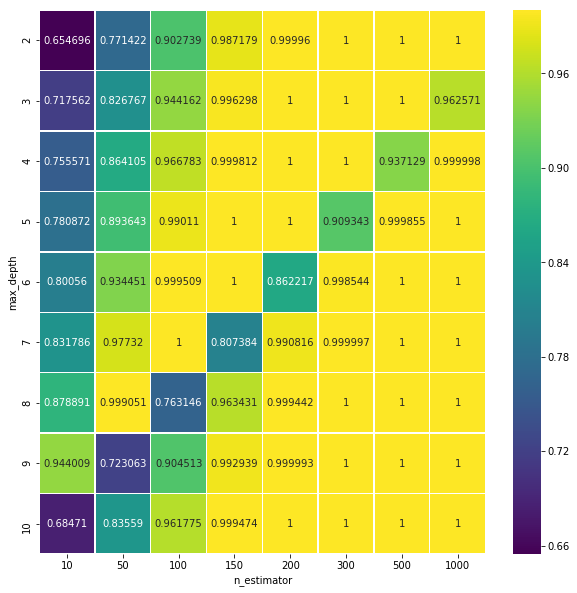

In [116]:
# https://stackoverflow.com/questions/37790429/seaborn-heatmap-using-pandas-dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn
fig, ax = plt.subplots(figsize=(10,10))

result = df_train_data.pivot(index='max_depth', columns='n_estimator', values='auc_score')
 
sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=.5,ax=ax)
plt.show()

### Heat maps with rows as n_estimators, columns as max_depth, and values inside the cell representing AUC Score(CV data Data)

In [0]:
lis_cv_data=[]
count_cv=0

for i in n_estimators_range:
  for j in max_depth_range:
    lis_cv_data.append((grid_search.cv_results_['mean_test_score'][count_cv],j,i))
    count_cv+=1


    

In [0]:
df_cv_data=pd.DataFrame(data=lis_cv_data,columns=['auc_score','max_depth','n_estimator'])


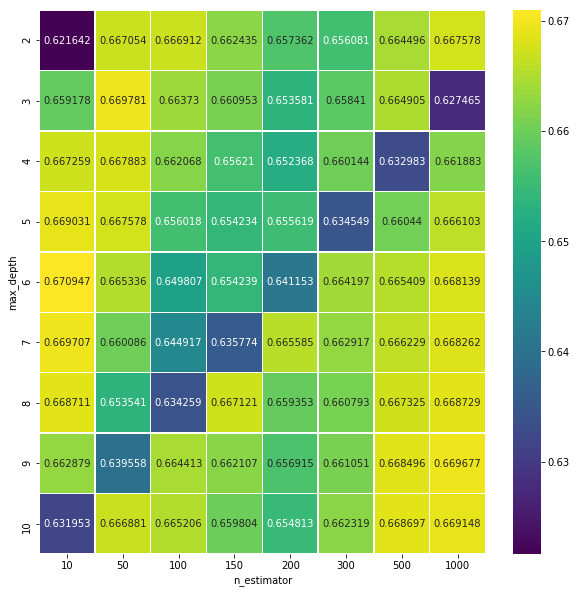

In [119]:
# https://stackoverflow.com/questions/37790429/seaborn-heatmap-using-pandas-dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn
fig, ax = plt.subplots(figsize=(10,10))

result = df_cv_data.pivot(index='max_depth', columns='n_estimator', values='auc_score')
 
sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=.5,ax=ax)
plt.show()

#### After finding the best hyper parameter, we are training our model-M using the best hyper-param.And, finding the AUC on test data and plotting the ROC curve on both train and test using model-M.

In [0]:
#here best hyper parameter (max_depth) 
best_n_estimators=200
best_max_depth= 2


### Finding the AUC on test data and plotting the ROC curve on both train and test using model-M

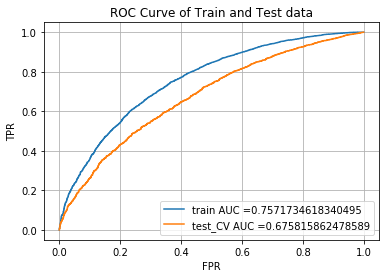

In [121]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

xgb_model=xgb.XGBClassifier(max_depth=best_max_depth,learning_rate=0.1,n_estimators=best_n_estimators,n_jobs=-1).fit(X_tr_TFIDF_W2V,y_train)
 
#svm_clf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred =xgb_model.predict_proba(X_tr_TFIDF_W2V)[:,1]
y_test_pred = xgb_model.predict_proba(X_te_TFIDF_W2V)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test_CV AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve of Train and Test data")
plt.grid()
plt.show()

### Confusion matrix of Train data

the maximum value of tpr*(1-fpr) 0.47517612143462484 for threshold 0.84


Text(0.5, 24.0, 'Predicted label')

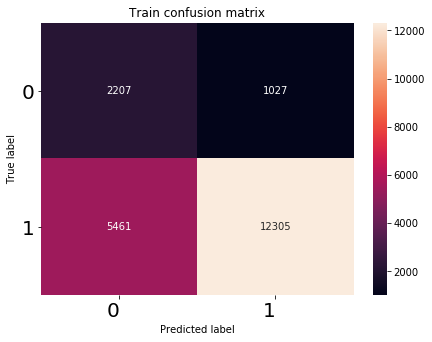

In [122]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(7,5))
cm_train=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
heatmap = sns.heatmap(cm_train, annot=True, fmt="d")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title("Train confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')


### Confusion matrix of Test data

the maximum value of tpr*(1-fpr) 0.3903531165154491 for threshold 0.852


Text(0.5, 24.0, 'Predicted label')

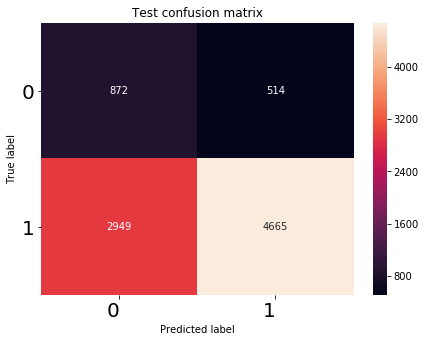

In [123]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

cm_test=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
fig = plt.figure(figsize=(7,5))
heatmap = sns.heatmap(cm_test, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title('Test confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

<h1>3. Conclusion</h1>

In [0]:
# Please compare all your models using Prettytable library

In [128]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
print("Random Forest Algorithm")
x.field_names = ["Vectorizer", "Model", "Hyper parameter(n_estimator) (Grid Search)","Hyper parameter(max_depth) (Grid Search)","AUC(TEST AUC)"]
x.add_row([("BOW"),("Random Forest"),(1000),(10),(0.6851)])
x.add_row([('TFIDF'),("Random Forest"),(1000),(10),(0.6809)])
x.add_row([("AVG_W2V"),("Random Forest"),(500),(7),(0.6604)])
x.add_row([('TFIDF_W2V'),("Random Forest"),(1000),(7),(0.6639)])


print(x)

Random Forest Algorithm
+------------+---------------+--------------------------------------------+------------------------------------------+---------------+
| Vectorizer |     Model     | Hyper parameter(n_estimator) (Grid Search) | Hyper parameter(max_depth) (Grid Search) | AUC(TEST AUC) |
+------------+---------------+--------------------------------------------+------------------------------------------+---------------+
|    BOW     | Random Forest |                    1000                    |                    10                    |     0.6851    |
|   TFIDF    | Random Forest |                    1000                    |                    10                    |     0.6809    |
|  AVG_W2V   | Random Forest |                    500                     |                    7                     |     0.6604    |
| TFIDF_W2V  | Random Forest |                    1000                    |                    7                     |     0.6639    |
+------------+---------------+-

In [129]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
print("XGBOOST Algorithm")
x.field_names = ["Vectorizer", "Model", "Hyper parameter(n_estimator) (Grid Search)","Hyper parameter(max_depth) (Grid Search)","AUC(TEST AUC)"]
x.add_row([("BOW"),("XGBOOST"),(500),(2),(0.7023)])
x.add_row([('TFIDF'),("XGBOOST"),(500),(2),(0.6846)])
x.add_row([("AVG_W2V"),("XGBOOST"),(200),(2),(0.6550)])
x.add_row([('TFIDF_W2V'),("XGBOOST"),(200),(2),(0.6758)])


print(x)

XGBOOST Algorithm
+------------+---------+--------------------------------------------+------------------------------------------+---------------+
| Vectorizer |  Model  | Hyper parameter(n_estimator) (Grid Search) | Hyper parameter(max_depth) (Grid Search) | AUC(TEST AUC) |
+------------+---------+--------------------------------------------+------------------------------------------+---------------+
|    BOW     | XGBOOST |                    500                     |                    2                     |     0.7023    |
|   TFIDF    | XGBOOST |                    500                     |                    2                     |     0.6846    |
|  AVG_W2V   | XGBOOST |                    200                     |                    2                     |     0.655     |
| TFIDF_W2V  | XGBOOST |                    200                     |                    2                     |     0.6758    |
+------------+---------+--------------------------------------------+----------

## Elaborating each steps (Random Forest):

1) For this Assignment I'm using only 30K data points.

2) There are two dataframes such as project_data and resources_data.

3) Merging all the features of resource_data into project_data by creating new columns. ex- data_quantity=resource_data['quantity'], project_data['quantity']=data_quantity, in this way.

4) Splitting the data into two parts such as train,test.

5) Encording all the categorical,numerical features by take caring of data leakage.

6) Encording Essay and project_title using (BOW,TFIDF,W2V,TFIDF W2V)

7) Concatenating all the categorical,numerical,(BOW,TFIDF,W2V,TFIDF W2V) features. Also Concatenating all the features names in different list.

8)Applying Random Treee Classifier(Bagging Technique ):-

(i) Finding best hyperparameter(max_depth) and (n_estimator) which results in the maximun AUC.

(ii) Here I'm using K-fold cross validation for finding optimal value of max_depth in DT.

-Here also I'm using Sklearn library to do so.
-Taking  max_depth value range which is max_depth(2 to 10).
-Taking  n_estimator value range which is n_estimator(10 to 10^3).
-I'm doing 3-fold cv=3 for better accuracy.
-Passing only training data.
-Scoring=roc_auc for calculating scoring. we can do other scoring matrix too but here I'm taking auc under consideration.
-Taking mean of all the score and plotting a plot b/w hyperparameter and average score.

(iii)Here I'm using GridSearchCV for finding optimal value of max_depth and n-estimator in RF.

-Here I'm passing on X_tr(train) data.
- CV value is 3 that I'm passing.
- Accuracy matrix is roc_auc
- It gives best parameters and best scoring.

9) Representation of result:

-Plotting a heatmap using gridsearchcv between train and cv then finding optimal value of max_depth and n_estimator by the help of seaborn heatmap.

10) After finding the optimal hyperparameter(max_depth,n_estimator):

-Trained the model using best hyperparameter. -Plotting roc_curve for both train and test data.

11) Making confusion matrix for train and test data.

12)At last we make prettytable to summarized the results.







## Elaborating each steps (XGBOOST):

1) For this Assignment I'm using only 30K data points.

2) There are two dataframes such as project_data and resources_data.

3) Merging all the features of resource_data into project_data by creating new columns. ex- data_quantity=resource_data['quantity'], project_data['quantity']=data_quantity, in this way.

4) Splitting the data into two parts such as train,test.

5) Encording all the categorical,numerical features by take caring of data leakage.

6) Encording Essay and project_title using (BOW,TFIDF,W2V,TFIDF W2V)

7) Concatenating all the categorical,numerical,(BOW,TFIDF,W2V,TFIDF W2V) features. Also Concatenating all the features names in different list.

8)Applying XGBOOST Classifier(Boosting Technique):-

(i) Finding best hyperparameter(max_depth) and (n_estimator) which results in the maximun AUC.

(ii) Here I'm using K-fold cross validation for finding optimal value of max_depth in DT.

-Here also I'm using Sklearn library to do so.
-Taking  max_depth value range which is max_depth(2 to 10).
-Taking  n_estimator value range which is n_estimator(10 to 10^3).
-I'm doing 3-fold cv=3 for better accuracy.
-Passing only training data.
-Scoring=roc_auc for calculating scoring. we can do other scoring matrix too but here I'm taking auc under consideration.
-Taking mean of all the score and plotting a plot b/w hyperparameter and average score.

(iii)Here I'm using GridSearchCV for finding optimal value of max_depth and n-estimator in XGBOOST .

-Here I'm passing on X_tr(train) data.
- CV value is 3 that I'm passing.
- Accuracy matrix is roc_auc
- It gives best parameters and best scoring.

9) Representation of result:

-Plotting a heatmap using gridsearchcv between train and cv then finding optimal value of max_depth and n_estimator by the help of seaborn heatmap.

10) After finding the optimal hyperparameter(max_depth,n_estimator):

-Trained the model using best hyperparameter. -Plotting roc_curve for both train and test data.

11) Making confusion matrix for train and test data.

12)At last we make prettytable to summarized the results.





